# Foundational Aspects of Machine Learning using Python

The objective of this tutorial is to introduce you to some foundational aspects of Machine Learning which are key to delve in other topics such as Deep Learning.

We will not go in the details of many algorithms and models, but rather stay at a high-level where we will focus on the strategic choices that we can make around our data and objectives.

More specifically, we will only cover supervised learning: the case where we have "*target*" variable which we are trying to predict.

Typically, the target can be :
* **categorical** in which case we are doing **classification**
* **continuous** in which case we are doing **regression**

These use different models and metrics, but many strategies are the same

> NB: these are only the most common aspects, but other exists.


In [1]:
## first, a few import
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

## figure configuration
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 5, 5
plt.rc("font", size=10)


plt.rc('xtick', color='k', labelsize='medium', direction='in')
plt.rc('xtick.major', size=8, pad=12)
plt.rc('xtick.minor', size=8, pad=12)

plt.rc('ytick', color='k', labelsize='medium', direction='in')
plt.rc('ytick.major', size=8, pad=12)
plt.rc('ytick.minor', size=8, pad=12)

## motivating example

[Acharjee et al.2016](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-016-1043-4) propose several -omic dataset which they used to predict and gain knowledge on various phenotypic traits in potatos.

Here, we will concentrate on the their transcriptomics dataset and the phenotypic trait of the potato coloration.

We have pre-selected and normalized the 200 most promising genes (out of ~15 000).

In [2]:
file_metadata = "https://github.com/sib-swiss/statistics-and-machine-learning-training/raw/refs/heads/main/data/potato_data.phenotypic.csv"
file_data = "https://github.com/sib-swiss/statistics-and-machine-learning-training/raw/refs/heads/main/data/potato_data.transcriptomic.top200norm.csv"

df = pd.read_csv( file_metadata , index_col=0 )
dfTT = pd.read_csv( file_data , index_col=0)

df.shape

(86, 8)

For the sake of our story, we will imagine that out of the 86 potatos in the data, we have only 73 at the time of our experiment.

We put aside the rest for later.

In [3]:
i1 = df.index[:73]
i2 = df.index[73:]

In [4]:
X = dfTT.loc[i1 , :]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Genotype,,,,,,,,,,,,,,,,,,,,,
CE017,0.086271,-0.790631,-0.445972,0.788895,0.510650,0.626438,0.829346,0.432200,-1.344748,1.794652,...,-0.754008,-0.013125,0.852473,1.067286,0.877670,0.537247,1.251427,1.052070,-0.135479,-0.526788
CE069,-0.540687,0.169014,0.282120,-1.107200,-1.200370,0.518986,1.027663,-0.374142,-0.937715,1.488139,...,-0.237367,0.684905,1.460319,-1.570253,0.547969,0.635307,0.257955,1.043724,0.733218,-1.768250
CE072,-1.713273,-1.400956,-1.543058,-0.930367,-1.058800,-0.455020,-1.302403,-0.110293,-0.332380,-0.232460,...,-0.131733,-0.070336,0.821996,-1.566652,0.914053,-1.707726,0.498226,-1.500588,0.361168,-1.020456
CE084,-0.096239,-0.599251,-1.499636,-0.847275,-1.171365,-0.952574,-1.347691,0.561542,-0.335009,-0.702851,...,-0.729461,0.135614,1.074398,0.629679,-0.691100,-1.247779,0.167965,-1.525064,0.150271,0.105746
CE110,-0.712374,-1.081618,-1.530316,-1.259747,-1.109999,-0.582357,-1.233085,0.008014,-0.915632,-0.746339,...,-0.054882,0.363344,0.720155,0.465315,1.450199,-1.706606,0.602451,-1.507727,-2.207455,-0.139036


In [5]:
y = df.loc[i1 , "Flesh Colour"]
y.describe()

count    73.000000
mean     24.473845
std      12.437785
min       6.992000
25%      13.484500
50%      24.746500
75%      30.996200
max      57.035100
Name: Flesh Colour, dtype: float64

<Axes: xlabel='Flesh Colour', ylabel='Count'>

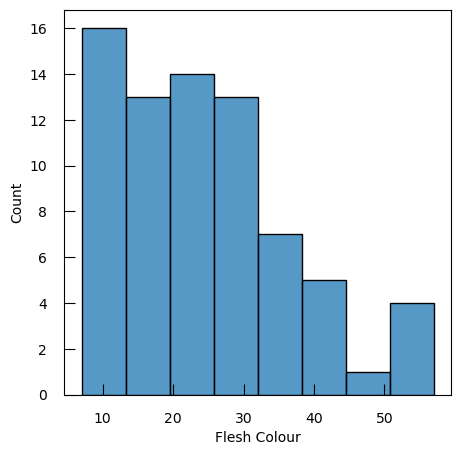

In [6]:
sns.histplot(y)

## Linear regression

### approach 1: a simple linear regression

Let's fit a simple linear model with our gene expression values, and see what happens

In [7]:
## we import elements from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

# create the regression object
lin_reg = LinearRegression()

# fit it with our data
lin_reg.fit(X,y)

# predict
y_pred = lin_reg.predict( X )

# evaluate the prediction
print(f"R-squared score: { r2_score( y , y_pred ) :.2f}")
print(f"mean squared error: { mean_squared_error( y , y_pred ) :.2f}")

R-squared score: 1.00
mean squared error: 0.00


### ANNEX : "generic" sklearn usage 

The main library we will be using for machine learning is scikit-learn.

It should go without saying that if you have any questions regarding its usage and capabilities, your first stop should be their [website](https://scikit-learn.org/stable/),
especially since it provides plenty of [examples](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py), [guides](https://scikit-learn.org/stable/user_guide.html), and [tutorials](https://scikit-learn.org/stable/tutorial/index.html#tutorial-menu).

Nevertheless, we introduce here the most common behavior of sklearn object.

Indeed, sklearn implement machine learning algorithms (random forest, clustering algorithm,...), as well as all kinds of preprocessers (scalin, missing value imputation,...) with a fairly consistent interface.

Most methods must first be instanciated as an object from a specific class:

```python
## import the class, here RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

## instanciate the class object:
my_clf = RandomForestClassifier()
```

As it stands, the object is just a "naive" version of the algorithm.

The next step is then to feed the object data, so it can learn from it. This is done with the `.fit` method:

```python
my_clf.fit( X , y )
```
> In this context, `X` is the data and `y` is the objective to attain. When the object is not an ML algorithm but a preprocessor, you only give the `X`

Now that the object has been trained with your data, you can use it. For instance, to:
* `.transform` your data (typically in the case of a preprocessor)
* `.predict` some output from data (typically in the case of an ML algorithm, like a classifier)

```python
y_predicted = clf.predict(X)  # predict classes of the training data

## OR 

X_scaled = myScaler.transform(X)  # apply a transformation to the data
```

Last but not least, it is common in example code to "fit and transform" a preprocesser in the same line using `.fit_transform`

```python
X_scaled = myNaiveScaler.fit_transform(X)  # equivalent to myNaiveScaler.fit(X).transform(X)
```

That's the basics. You will be able to experiment at length with this and go well beyond it.

<br>


**Wow!!** this is a perfect fit.

But if you know anything about biology, or data analysis, then you likely suspect something wrong is happening.


Indeed, at the moment, our claim is that our model can predict flesh color perfectly (RMSE=0.0) from the normalized expression of these 200 genes.

But, say we now have some colleagues who come to us with some new potato data:


In [8]:
## now we use the leftover data points:
Xnew = dfTT.loc[i2 , :]
ynew = df.loc[i2 , "Flesh Colour"]

## apply the model on the new data
ynew_pred = lin_reg.predict( Xnew )

# evaluate the prediction
print(f"new data R-squared score: { r2_score( ynew , ynew_pred ) :.2f}")
print(f"new data mean squared error: { mean_squared_error( ynew , ynew_pred ) :.2f}")

new data R-squared score: 0.47
new data mean squared error: 130.47


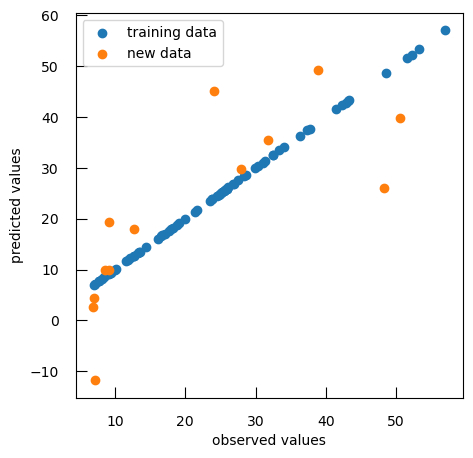

In [9]:
plt.scatter( y , y_pred , label = 'training data' )
plt.scatter( ynew , ynew_pred , label = 'new data' )
plt.xlabel('observed values')
plt.ylabel('predicted values')
plt.legend()

As expected, the performance on the new data is not as good as with the data we used to train the model.

We have **overfitted** the data.


<br>

Here, we could still use the model that we have created, 
but we would agree that reporting the perfect performance we had with our training data would be misleading.

To honestly report the performance of our model, we measure it on a **set of data that has not been used at all to train it: the *test set*.**



To that end, we typically begin by dividing our data into :

 * **train** set : find the best model
 * **test** set  : give an honest evaluation of how the model perform on completely new data.

![train_test](images/train_test.png)

In [10]:
X_test = Xnew
y_test = ynew

### approach 2: adding regularization and validation set

In the case of a Least Square fit, the function you are minimizing looks like:

$\sum_i (y_i-f(\pmb X_i,\pmb{\beta}))^2$

, so the sum of squared difference between the observation and the predictions of your model.


**Regularization** is a way to reduce overfitting, and in the case of the linear model
we do so by adding to this function a **penalization term which depends on coefficient weights**.

In brief, the stronger the coefficient, the higher the penalization. So only coefficients which bring more fit than penalization will be kept.


> Note : we report here the formulas used in `scikit-learn` functions. Other libraries may have a different parameterization, but the concepts stay the same

$\frac{1}{2n}\sum_i (y_i-f(\pmb X_i,\pmb{\beta}))^2 + \alpha\sum_{j}|\beta_{j}|$ , **l1 regularization** (Lasso) $\alpha$ being the weight that you put on that regularization 

$\sum_i (y_i-f(\pmb X_i,\pmb{\beta}))^2 + \alpha\sum_{j}\beta_{j}^{2}$ , **l2 regularization** (Ridge) 

$\frac{1}{2n}\sum_i (y_i-f(\pmb X_i,\pmb{\beta}))^2 + \alpha\sum_{j}(\rho|\beta_{j}|+\frac{(1-\rho)}{2}\beta_{j}^{2})$ , **elasticnet**


For a deeper understanding of those notions, you may look at :

 * https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

 * https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a



> NB: Regularization generalize to maximum likelihood contexts as well)




Let's try that on our data:

In [11]:
%%time
from sklearn.linear_model import SGDRegressor


logalphas = []

coef_dict = {'name' : [],
             'coefficient' : [],
             'log-alpha' : []}
r2 = []

for alpha in np.logspace(-2,2,50):

    reg = SGDRegressor( penalty='l1' , alpha = alpha )
    reg.fit( X , y )
    
    logalphas.append(np.log10(alpha))
    r2.append( r2_score( y , reg.predict(X) ) )
    
    coef_dict['name'] += list( X.columns )
    coef_dict['coefficient'] += list( reg.coef_ )
    coef_dict['log-alpha'] += [np.log10(alpha)]* len(X.columns )

coef_df = pd.DataFrame(coef_dict)

CPU times: user 2.56 s, sys: 30.8 ms, total: 2.59 s
Wall time: 684 ms


Text(0.5, 0.98, 'regression of potato data with an L1 regularization.')

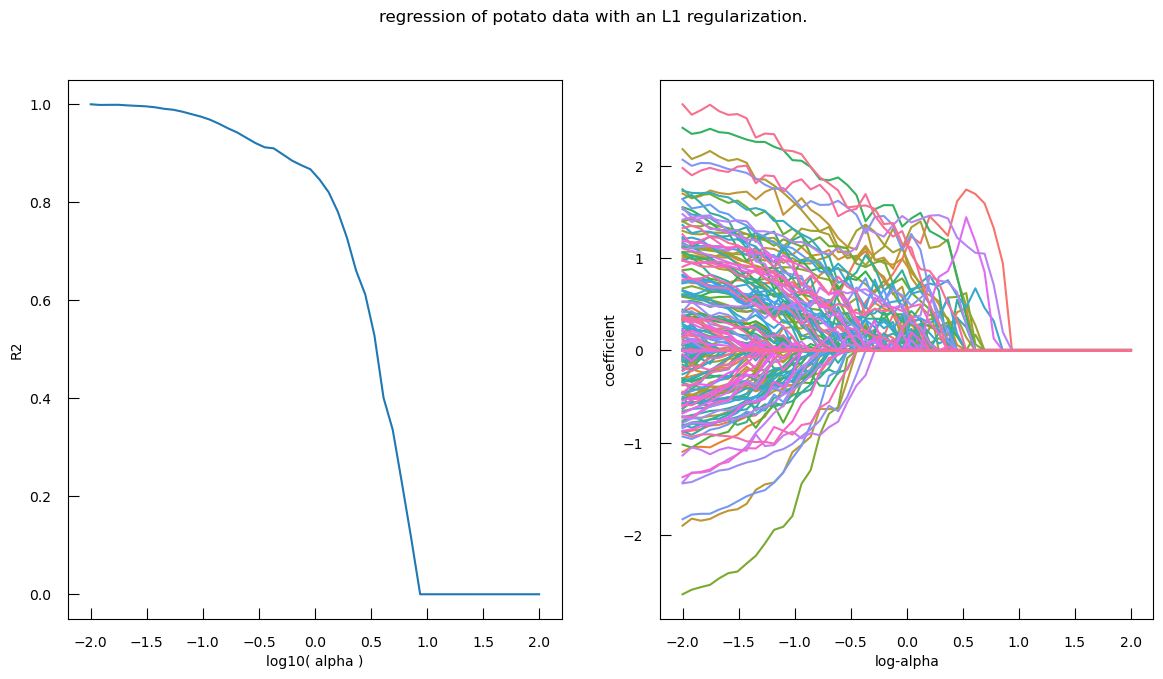

In [12]:

fig,ax = plt.subplots(1,2,figsize = (14,7))

ax[0].plot(logalphas , r2)
ax[0].set_xlabel("log10( alpha )")
ax[0].set_ylabel("R2")

sns.lineplot( x = 'log-alpha' , y='coefficient' , hue = 'name' , data= coef_df , ax = ax[1] ,legend = False)

fig.suptitle("regression of potato data with an L1 regularization.")



**Micro-exercise:** adapt the code above to generate this plot with an l2 penalty. How do you interpret the difference?


Text(0.5, 0.98, 'regression of potato data with an L2 regularization.')

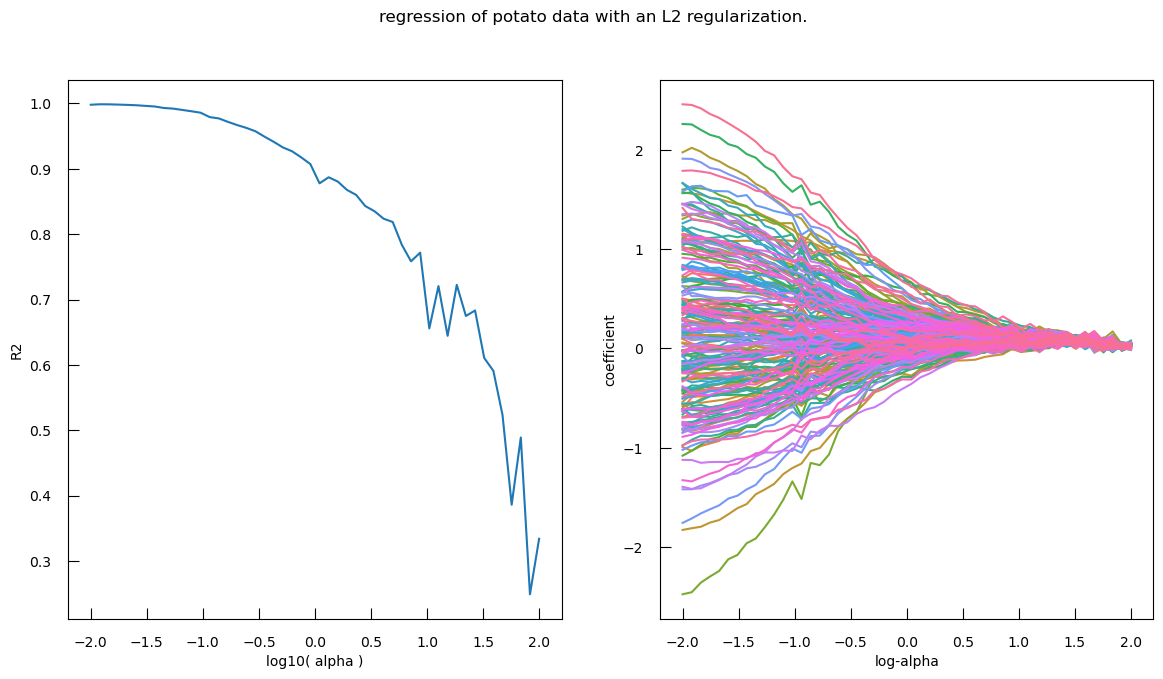

In [13]:
### correction
from sklearn.linear_model import SGDRegressor


logalphas = []

coef_dict = {'name' : [],
             'coefficient' : [],
             'log-alpha' : []}
r2 = []

for alpha in np.logspace(-2,2,50):

    reg = SGDRegressor( penalty='l2' , alpha = alpha )
    reg.fit( X , y )
    
    logalphas.append(np.log10(alpha))
    r2.append( r2_score( y , reg.predict(X) ) )
    
    coef_dict['name'] += list( X.columns )
    coef_dict['coefficient'] += list( reg.coef_ )
    coef_dict['log-alpha'] += [np.log10(alpha)]* len(X.columns )

coef_df = pd.DataFrame(coef_dict)

fig,ax = plt.subplots(1,2,figsize = (14,7))

ax[0].plot(logalphas , r2)
ax[0].set_xlabel("log10( alpha )")
ax[0].set_ylabel("R2")

sns.lineplot( x = 'log-alpha' , y='coefficient' , hue = 'name' , data= coef_df , ax = ax[1] ,legend = False)

fig.suptitle("regression of potato data with an L2 regularization.")

This is great, but how do we choose which level of regularization we want ?

It is a general rule that **as you decrease $\alpha$, the $R^2$ on the data used for the fit increase**, i.e. you risk overfitting.

Consequently, we cannot choose the value of $\alpha$ parameter from the data used to fit alone; we call such a parameter an **hyper-parameter**.

**Question:** what are other hyper-parameters we could optimize at this point?

---

<br>

In order to find the optimal value of an hyper-parameter, we can separate our training data into:
 * a **train set** : used to fit the model
 * a **validation set** : used to evaluate how our model perform on new data 


In [14]:
X.shape

(73, 200)

CPU times: user 12.2 s, sys: 244 ms, total: 12.5 s
Wall time: 3.15 s


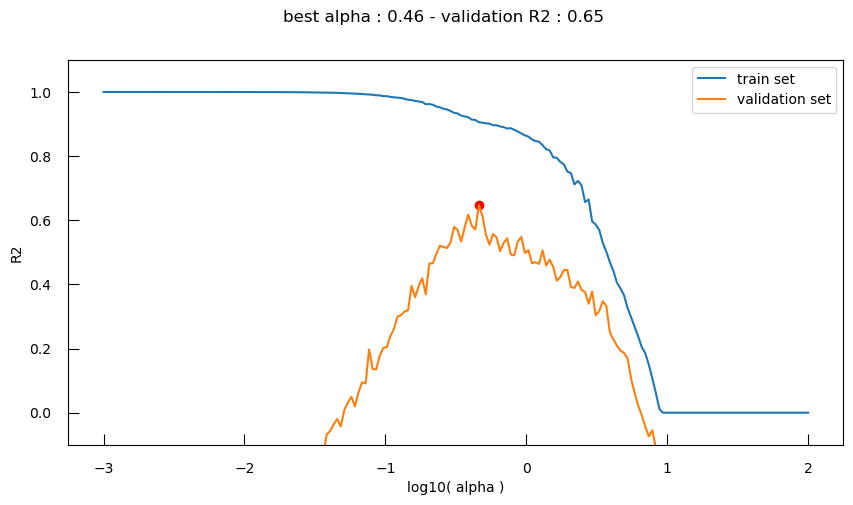

In [15]:
%%time
## adding a validation set

# we will use 60 points to train the model
# and we will use the rest to evaluate the model 
I = list( range(X.shape[0]))
np.random.shuffle( I ) 

I_train = I[:60]
I_valid = I[60:]

X_train = X.iloc[ I_train , : ] 
y_train = y.iloc[ I_train ]

# we will use the rest to evaluate the model
X_valid = X.iloc[ I_valid , : ] 
y_valid = y.iloc[ I_valid ]


logalphas = []

r2_train = []
r2_valid = []

for alpha in np.logspace(-3,2,200):

    reg = SGDRegressor( penalty='l1' , alpha = alpha  )
    reg.fit( X_train , y_train )
    
    logalphas.append(np.log10(alpha))
    r2_train.append( r2_score( y_train , reg.predict(X_train) ) )
    r2_valid.append( r2_score( y_valid , reg.predict(X_valid) ) )
    
## plotting and reporting 
bestI = np.argmax(r2_valid)
bestLogAlpha = logalphas[bestI]
bestR2_valid = r2_valid[bestI]

fig,ax = plt.subplots(figsize = (10,5))
fig.suptitle("best alpha : {:.2f} - validation R2 : {:.2f}".format(10**bestLogAlpha , bestR2_valid))
ax.plot( logalphas, r2_train , label='train set' )
ax.plot( logalphas, r2_valid , label='validation set' )
ax.scatter( [bestLogAlpha] , [bestR2_valid]  , c='red')
ax.set_xlabel("log10( alpha )")
ax.set_ylabel("R2")
ax.set_ylim(-0.1,1.1)
ax.legend()


So now, with the help of a validation set, we can clearly see the phases :
 * **underfitting** : for high $\alpha$, the performance is low for both the train and the validation set
 * **overfitting** : for low $\alpha$, the performance is high for the train set, and low for the validation set
 
We want the equilibrium point between the two where performance is ideal for the validation set.

**Problem :** if you run the code above several time, you will see that the optimal point varies due to the random assignation to train or validation set. 

There exists a myriad of possible strategies to deal with that problem, such as repeating the above many times and taking the average of the results for instance.
Note also that this problem gets less important as the validation set size increases.

<br>

---

<br>

Anyhow, on top of our earlier regression model, we have added :

 * an **hyper-parameter** : $\alpha$, the strength of the regularization term
 * a **validation strategy** for our model in order to avoid overfitting

<br>

That's it, we are now in the world of Machine Learning.

But before we go any further, let's see how this modified model performs on the test data:

train data R-squared score: 0.90
train data mean squared error: 15.81
 test data R-squared score: 0.73
 test data mean squared error: 65.83


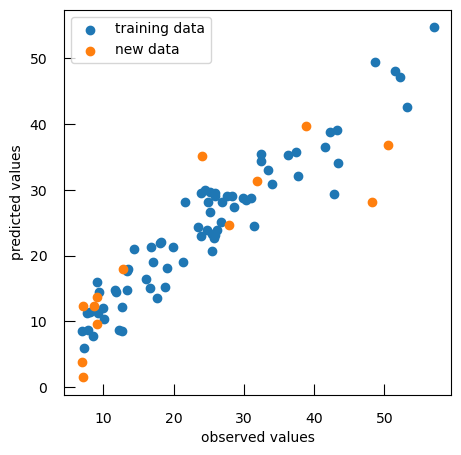

In [16]:

reg = SGDRegressor( penalty='l1' , alpha = 10**bestLogAlpha  )
reg.fit( X , y )

y_pred = reg.predict( X )
print(f"train data R-squared score: { r2_score( y , y_pred ) :.2f}")
print(f"train data mean squared error: { mean_squared_error(  y , y_pred ) :.2f}")


y_test_pred = reg.predict( X_test )

print(f" test data R-squared score: { r2_score( y_test , y_test_pred ) :.2f}")
print(f" test data mean squared error: { mean_squared_error(  y_test , y_test_pred ) :.2f}")


plt.scatter( y , y_pred , label = 'training data' )
plt.scatter( y_test , y_test_pred , label = 'new data' )
plt.xlabel('observed values')
plt.ylabel('predicted values')
plt.legend()

Two things to observe:
 * we still see better performance on the train data than on the test data (generally always the case)
 * the performance on the test set has improved: our model is less overfit and more generalizable

###  approach 3 : k-fold cross-validation

In the previous approach, we have split our training data into a train set and a validation set.

This approach works well if you have enough data for your validation set to be representative.

Often, we unfortunately do not have enough data for this.

Indeed, we have seen that if we run the code above several time, we see that the optimal point varies due to the random assignation to train or validation set. 


**K-fold cross validation** is one of the most common strategy to try to mitigate this randomness with a limited amount of data.

![k-fold validation](images/kfold.png)

In k-fold cross-validation, you split you data in $k$ subpart, called fold.

Then, for a given hyper-parameter values combination, you actually train $k$ model: each time you use a different fold for validation (and the remaining $k-1$ folds for training).

You then compute the average performance across all fold : this is the **cross-validated performance**.

--- 

We are going to do a simple k-fold manually once, to explore a bit how it works, but in practice you will discover that it is mostly automatized with some of scikit-learn's recipes and objects.

In [17]:
## Kfold
from sklearn.model_selection import KFold



kf = KFold(n_splits=5 , shuffle=True , random_state=734)
for i, (train_index, valid_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={valid_index}")


Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 24 25 26
 27 28 29 30 31 33 34 35 39 40 41 45 46 47 48 50 51 53 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 72]
  Test:  index=[ 8 16 23 32 36 37 38 42 43 44 49 52 54 70 71]
Fold 1:
  Train: index=[ 4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 23 24 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 42 43 44 46 47 48 49 50 51 52 53 54 56 57 58 59
 60 61 62 63 64 65 66 67 70 71]
  Test:  index=[ 0  1  2  3  7 17 22 25 40 41 45 55 68 69 72]
Fold 2:
  Train: index=[ 0  1  2  3  4  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49 52 53 54 55
 57 59 61 64 65 68 69 70 71 72]
  Test:  index=[ 5  9 28 29 30 46 50 51 56 58 60 62 63 66 67]
Fold 3:
  Train: index=[ 0  1  2  3  5  6  7  8  9 12 14 16 17 19 20 22 23 25 28 29 30 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 49 50 51 52 54 55 56 57 58 59 60
 61 62 63 64 66 67 68 69 70 71 72]
  Test:

CPU times: user 13.6 s, sys: 0 ns, total: 13.6 s
Wall time: 13.6 s


Text(0.5, 0.98, 'best alpha : 0.52 - cross-validated R2 : 0.54')

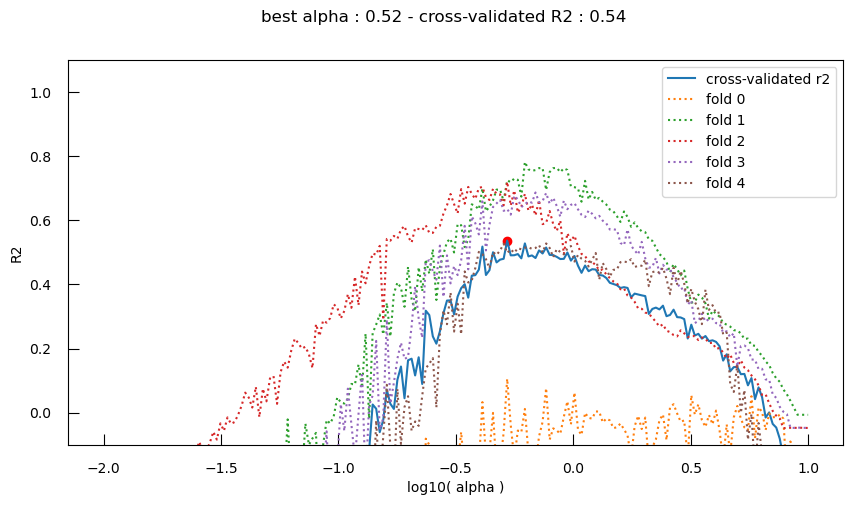

In [18]:
%%time
logalphas = np.linspace(-2,1,200)

kf = KFold(n_splits=5 , shuffle=True , random_state=6581) ## try changing the random state

fold_r2s = [ [] for i in range(kf.n_splits) ] ## for each fold
cross_validated_r2 = [] # average across folds
   
for j,alpha in enumerate( 10**logalphas ) :

    cross_validated_r2.append(0)
    
    for i, (train_index, valid_index) in enumerate(kf.split(X)):

        ## split train and validation sets
        X_train = X.iloc[ train_index , : ]
        X_valid = X.iloc[ valid_index , : ]

        y_train = y.iloc[ train_index ]
        y_valid = y.iloc[ valid_index ]

        ## fit model for that fold
        reg = SGDRegressor( penalty='l1' , alpha = alpha  )
        reg.fit( X_train , y_train )

        ## evaluate for that fold
        fold_score = r2_score( y_valid , reg.predict(X_valid) )
        
        ## keeping in the curve specific to this fold
        fold_r2s[i].append( fold_score )
        
        ## keeping a tally of the average across folds
        cross_validated_r2[-1] += fold_score/kf.n_splits

        
        

bestI = np.argmax(cross_validated_r2)
bestLogAlpha = logalphas[bestI] 
bestR2_valid = cross_validated_r2[bestI]


## plotting
fig,ax = plt.subplots(figsize = (10,5))

ax.plot( logalphas, cross_validated_r2 , label='cross-validated r2' )
ax.scatter( [bestLogAlpha] , [bestR2_valid]  , c='red')

for i,scores in enumerate(fold_r2s):
    ax.plot( logalphas , scores , label = f'fold {i}' , linestyle='dotted' )

ax.set_xlabel("log10( alpha )")
ax.set_ylabel("R2")
ax.set_ylim(-0.1,1.1)
ax.legend()

fig.suptitle("best alpha : {:.2f} - cross-validated R2 : {:.2f}".format(10**bestLogAlpha , bestR2_valid))



**micro-exercise**: re-fit a model with the alpha we found and check the performance with the *test* data

train data R-squared score: 0.90
train data mean squared error: 14.99
 test data R-squared score: 0.72
 test data mean squared error: 69.05


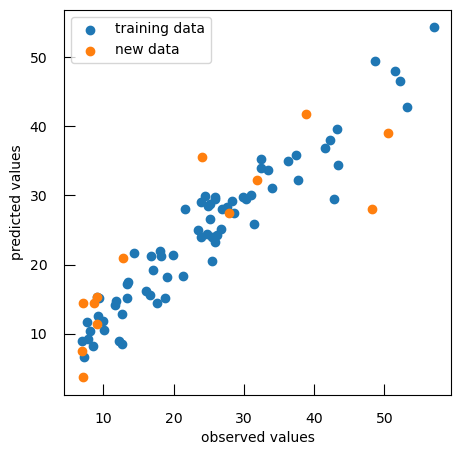

In [19]:
### solution
reg = SGDRegressor( penalty='l1' , alpha = 10**bestLogAlpha  )
reg.fit( X , y )

y_pred = reg.predict( X )
print(f"train data R-squared score: { r2_score( y , y_pred ) :.2f}")
print(f"train data mean squared error: { mean_squared_error(  y , y_pred ) :.2f}")


y_test_pred = reg.predict( X_test )

print(f" test data R-squared score: { r2_score( y_test , y_test_pred ) :.2f}")
print(f" test data mean squared error: { mean_squared_error(  y_test , y_test_pred ) :.2f}")

plt.scatter( y , y_pred , label = 'training data' )
plt.scatter( y_test , y_test_pred , label = 'new data' )
plt.xlabel('observed values')
plt.ylabel('predicted values')
plt.legend()

There, you can realize that now, for each possible value of our hyper-parameter we fit and evaluate not 1, but $k$ models, here 4.

So, for 200 values of $\alpha$, that means 200x5 = 1000 models to fit and evaluate.

Now, consider that we have other hyper-parameters, such as the type of regularization (L1 or L2),
or how we perform scaling, or whether we consider interactions, and now you understand why Machine Learning can quickly become  computationnaly intensive. 

---


### approach 4 : a "classical" ML pipeline

We will start back frmo scratch to recapitulate what we've seen and use scikit-learn to solve the potato problem.


In [20]:
## full dataset
X = dfTT
y = df[ "Flesh Colour"]


We start by splitting our data in a train and a test set

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2 )

print('train set size:',len(y_train))
print(' test set size:',len(y_test))

train set size: 68
 test set size: 18


Now we train a model while optimizing some hyper-parameters.

On top of what we've done before, I add a scaling phase, and test l1 or l2 penalties.

Scikit-learn's `GridSearchCV` is useful to explore these more "complex" hyper-parameter spaces.


In [22]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



## our pipeline will have 2 consecutive steps
##   * standard scaling : set mean of each feature at 0 and (optionally) standard dev at 1 
##   * linear regression with some regularization
pip_reg = Pipeline([('scaler',StandardScaler()),
                    ('model',SGDRegressor())])



# define the hyperparameters you want to test
# with the range over which you want it to be tested.
# 
# They are given in a dictionary with the structure:
#      pipelineStep__parameter : [set of values to explore]
#                  ^^
#                  note the double underscore _
grid_values = {'scaler__with_std' : [ True , False ],
               'model__penalty':[ 'l1' , 'l2' ],
               'model__alpha':np.logspace(-2,2,200)}


# Feed the pipeline and set of values to the GridSearchCV with the 
# score over which the decision should be taken (here, R^2).
# and the cross-validation scheme, here the number of fold in a stratified k-fold strategy
grid_reg = GridSearchCV(pip_reg, 
                        param_grid = grid_values, 
                        scoring='r2', 
                        cv = 5,
                        n_jobs=-1)

# When the actual fit happens
#  the gridSearchCV object will go through each hyperparameter value combination
#  and fit + evaluate each fold, and averages the score across each fold.
#
#  It then finds the combination that gave the best score and
#  use it to re-train a model with the whole train data
grid_reg.fit(X_train, y_train)

# get the best cross-validated score 
print(f'Grid best score ({grid_reg.scoring}): {grid_reg.best_score_:.3f}')

# print the best parameters
print('Grid best parameter :')
for k,v in grid_reg.best_params_.items():
    print(' {:>20} : {}'.format(k,v))


Grid best score (r2): 0.667
Grid best parameter :
         model__alpha : 6.517339604882427
       model__penalty : l2
     scaler__with_std : True
CPU times: user 3.01 s, sys: 181 ms, total: 3.19 s
Wall time: 15.4 s


train data R-squared score: 0.80
train data mean squared error: 32.03
 test data R-squared score: 0.59
 test data mean squared error: 74.11


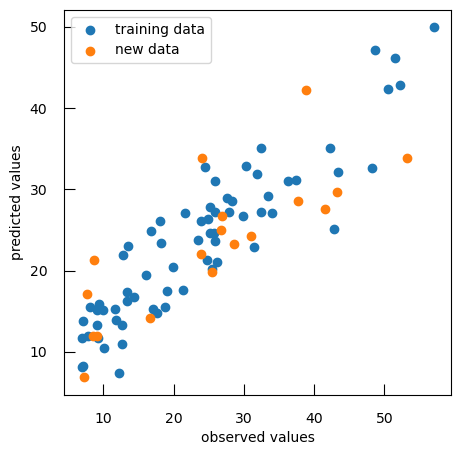

In [23]:
## gridSearch CV fits a new estimator with the best hyperparameter values
reg = grid_reg.best_estimator_

y_pred = reg.predict( X_train )
print(f"train data R-squared score: { r2_score( y_train , y_pred ) :.2f}")
print(f"train data mean squared error: { mean_squared_error(  y_train , y_pred ) :.2f}")


y_test_pred = reg.predict( X_test )

print(f" test data R-squared score: { r2_score( y_test , y_test_pred ) :.2f}")
print(f" test data mean squared error: { mean_squared_error(  y_test , y_test_pred ) :.2f}")



plt.scatter( y_train , y_pred , label = 'training data' )
plt.scatter( y_test , y_test_pred , label = 'new data' )
plt.xlabel('observed values')
plt.ylabel('predicted values')
plt.legend()

One can also access the best model parameter:

In [24]:
pd.DataFrame(grid_reg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__penalty,param_scaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032404,0.003947,0.007624,0.003920,0.010000,l1,True,"{'model__alpha': 0.01, 'model__penalty': 'l1',...",0.458166,0.426002,0.598553,0.090676,-0.436497,0.227380,0.371457,674
1,0.037641,0.002405,0.009909,0.007381,0.010000,l1,False,"{'model__alpha': 0.01, 'model__penalty': 'l1',...",0.489853,0.463623,0.608050,0.140120,-0.382414,0.263847,0.358448,603
2,0.020803,0.001697,0.006123,0.000453,0.010000,l2,True,"{'model__alpha': 0.01, 'model__penalty': 'l2',...",0.464953,0.451351,0.597122,0.102295,-0.413050,0.240534,0.365580,644
3,0.021677,0.001587,0.006235,0.000385,0.010000,l2,False,"{'model__alpha': 0.01, 'model__penalty': 'l2',...",0.491105,0.472125,0.606778,0.147489,-0.362163,0.271067,0.351509,579
4,0.035426,0.003058,0.006576,0.001052,0.010474,l1,True,"{'model__alpha': 0.010473708979594498, 'model_...",0.456685,0.432716,0.601580,0.102170,-0.437758,0.231079,0.372233,663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.009917,0.000802,0.004006,0.000370,95.477161,l2,False,"{'model__alpha': 95.47716114208056, 'model__pe...",0.447653,0.376443,0.497583,0.281709,0.374550,0.395588,0.073337,389
796,0.020417,0.001838,0.005503,0.002358,100.000000,l1,True,"{'model__alpha': 100.0, 'model__penalty': 'l1'...",-0.011842,-0.015431,-0.072717,-0.000012,-0.305135,-0.081028,0.114845,767
797,0.019441,0.001637,0.004185,0.000180,100.000000,l1,False,"{'model__alpha': 100.0, 'model__penalty': 'l1'...",-0.011947,-0.015128,-0.071826,-0.000032,-0.303618,-0.080510,0.114284,712
798,0.010385,0.001114,0.004745,0.000793,100.000000,l2,True,"{'model__alpha': 100.0, 'model__penalty': 'l2'...",0.284024,0.397677,0.350576,0.233945,-0.024301,0.248384,0.147355,625


In [25]:
grid_reg.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SGDRegressor(alpha=np.float64(6.517339604882427)))])

In [26]:
## coefficient of the linear model
grid_reg.best_estimator_['model'].coef_

array([ 0.07596183,  0.08908666,  0.07726874,  0.13853214,  0.11411034,
        0.21309178,  0.23083614,  0.15416228,  0.11586067,  0.17320989,
        0.0072154 ,  0.08692091,  0.03638004,  0.03821337,  0.16076304,
        0.04919011, -0.02181691,  0.05674762,  0.09414306,  0.06356158,
        0.1330752 ,  0.20393906,  0.22591514,  0.21392076,  0.15081917,
        0.02626813,  0.07139148,  0.27921001,  0.13219269,  0.08850799,
        0.09908963,  0.12206316,  0.05007974,  0.20728619,  0.07130918,
        0.05604948,  0.08720831,  0.1005811 ,  0.07063239,  0.05003676,
        0.14420185,  0.11209901,  0.2172456 ,  0.26056681,  0.2911001 ,
        0.15104056,  0.00643301,  0.04912094,  0.04061295,  0.05643299,
        0.11017754,  0.07681494,  0.21196616,  0.28126451,  0.15467303,
        0.10746634, -0.03472601,  0.13900833,  0.13244968,  0.14426168,
        0.06987389, -0.02025816,  0.2951747 ,  0.13499763,  0.09203625,
        0.03633566,  0.15794431,  0.20449762,  0.07385663,  0.04



## Logistic regression

Let's imagine a simple case with 2 groups, and a single feature:

<Axes: ylabel='Count'>

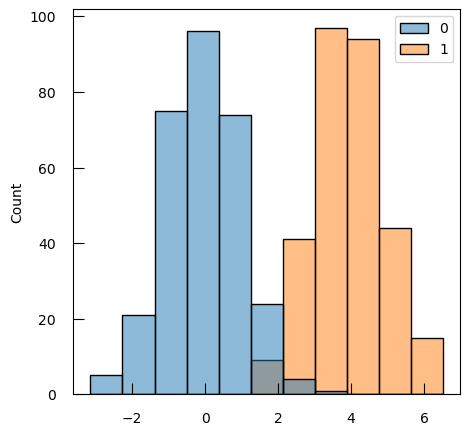

In [27]:
X1 = np.concatenate( [ np.random.randn(300) , np.random.randn(300)+4 ])
y = np.array( [0]*300 + [1]*300 )

sns.histplot( x=X1,hue = y )

We will use a logistic regression to model the relationship between the class and the feature.

Remember : **Logistic regression does not model the class directly, but rather model the class probabilities** (through the logit transform)

Let's see how regularization affect the class probabilities found by our model:

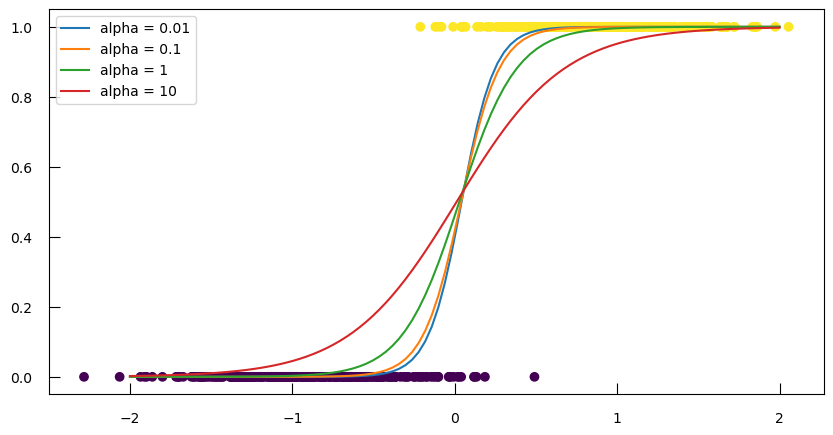

In [28]:
from sklearn.linear_model import LogisticRegression

# do not forget to scale the data
X1_norm = StandardScaler().fit_transform(X1.reshape( X1.shape[0] , 1 ))

fig,ax = plt.subplots( figsize = (10,5) )

ax.scatter( X1_norm , y , c = y )

for alpha in [0.01,0.1,1,10]:
    
    # this implementation does not take alpha but rather C = 1/alpha
    C = 1/alpha
    lr = LogisticRegression( penalty = 'l2' , C = C )
    lr.fit(X1_norm , y)
    
    proba = lr.predict_proba(np.linspace(-2,2,100).reshape(-1, 1))
    ax.plot( np.linspace(-2,2,100) , proba[:,1] , label = 'alpha = {}'.format(alpha) )
ax.legend()

We can see that **when $\alpha$ grows the probabilities evolve more smoothly** ie. we have more regularization.

> However, note that all the curves meet at the same point, corresponding to the 0.5 probability.

This is nice, but **our end-goal is to actually be able to predict the classes**, and not just the probabilities.

Our task is not regression anymore, but rather **classification**.

So here, we do not evaluate the model using $R^2$ or log-likelihood, but a classification metric.

we will discuss a few of these metrics, and we will begin by the most common: **Accuracy**


The Accuracy is the proportion of samples which were correctly classified (as either category).

More mathematically:

$$Accuracy = \frac{TP + TN}{TP+FP+FN+TN}$$

![image/TPFP.png](images/TPFP.png)
Image credit wikipedia user Sharpr for svg version. original work by kakau in a png. Licensed under the [Creative Commons Attribution-Share Alike 3.0 Unported license](https://creativecommons.org/licenses/by-sa/3.0/deed.en).


* TP : True Positive
* FP : False Positive
* TN : True Negative
* FN : False Negative

So you can see that accuracy forces us to make a choice about the **probability threshold we use predict categories**.

0.5 is a common choice, and the default of the `predict` method:


In [29]:
from sklearn.metrics import accuracy_score
y_predicted = lr.predict(X1_norm)

print( f"Accuracy with a threshold of 0.5 : {accuracy_score(y,y_predicted):.2f}"  )

pd.crosstab( y , y_predicted , rownames = ['observed'] , colnames = ['predicted'] )

Accuracy with a threshold of 0.5 : 0.98


predicted,0,1
observed,,
0,292,8
1,5,295


But it can be useful to remember that this is only 1 choice among many:

In [30]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [31]:
threshold = 0.2
y_predicted = lr.predict_proba(X1_norm)[:,1] > threshold
print( f"Accuracy with a threshold of {threshold} : {accuracy_score(y,y_predicted):.2f}"  )
pd.crosstab( y , y_predicted , rownames = ['observed'] , colnames = ['predicted'] )

Accuracy with a threshold of 0.2 : 0.92


predicted,False,True
observed,,
0,254,46
1,0,300


**Micro-exercise :** modify the threhold in the code above. 
 * in which direction should the threshold move to limit the number of False Positive ?
 * for which application could that be useful ? 


### Exercise: Logistic regression to detect breast cancer malignancy

Let's build a logistic regression model that will be able to predict if a breast tumor is malignant or not

In [32]:
from sklearn.datasets import load_breast_cancer
#loading the dataset which is comprised in scikit learn already
data = load_breast_cancer()

## we reduce the features because otherwise this problem is a bit too easy ;-)
m = list( map( lambda x : x.startswith("mean ") , data["feature_names"] ) )


X_cancer=data['data'][:,m]
y_cancer= 1-data['target']

#making it into a dataframe
breast_cancer_df=pd.DataFrame(X_cancer,
    columns=data["feature_names"][m])

breast_cancer_df["target"]=y_cancer

breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [33]:
breast_cancer_df.target.value_counts()

target
0    357
1    212
Name: count, dtype: int64

* 357 benign samples
* 212 malignant samples

Here, all these covariables / features are defined on very different scales, for them to be treated fairly in their comparison you need to take that into account by scaling.



**task 1:** split the data into a train and a test dataset

Complete the following code cell:

In [ ]:
#split your data

# stratify is here to make sure that you split keeping the repartition of labels unaffected
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = ...


print("fraction of class malignant in train",sum(y_train_cancer)/len(y_train_cancer))
print("fraction of class malignant in test ",sum(y_test_cancer)/len(y_test_cancer) )
print("fraction of class malignant in full ",sum(y_cancer)/len(y_cancer))

**task 2:** design your pipeline and grid search

Complete the following cell to perform hyper-parameter search with the following specification:

* hyperparameters:
    * scaler : no hyper-parameters for the scaler (ie, we will keep the defaults)
    * logistic regression : test different values for `C` and `penalty` 
* score: 'accuracy'
* cross-validation: use 10 folds


> If you want to test the elasticnet penalty, you will also have to adapt the `solver` parameter (cf. the [LogisticRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) )


In [ ]:
%%time

pipeline_lr_cancer=Pipeline([('scaler',StandardScaler()),
                             ('model',LogisticRegression(solver = 'liblinear'))])

#define the hyper-parameter space to explore
grid_values = { ... }

#define the GridSearchCV object
grid_cancer = GridSearchCV( ... )

#train your pipeline
grid_cancer.fit( ... )


#get the best cross-validated score 
print(f'Grid best score ({grid_cancer.scoring}): {grid_cancer.best_score_:.3f}')
# print the best parameters
print('Grid best parameter :')
for k,v in grid_cancer.best_params_.items():
    print(' {:>20} : {}'.format(k,v))


Correction:

In [35]:
## solution

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer,
                                                                                y_cancer,
                                                                                random_state=0,
                                                                                stratify=y_cancer)


print("fraction of class malignant in train",sum(y_train_cancer)/len(y_train_cancer))
print("fraction of class malignant in test ",sum(y_test_cancer)/len(y_test_cancer) )
print("fraction of class malignant in full ",sum(y_cancer)/len(y_cancer))

fraction of class malignant in train 0.3732394366197183
fraction of class malignant in test  0.3706293706293706
fraction of class malignant in full  0.37258347978910367


In [36]:
%%time

pipeline_lr_cancer=Pipeline([('scaler',StandardScaler()),
                             ('model',LogisticRegression(solver = 'liblinear'))])

#define the hyper-parameter space to explore
grid_values = { 'model__C': np.logspace(-5,2,100),
               'model__penalty':['l1','l2'] }

#define the GridSearchCV object
grid_cancer = GridSearchCV( pipeline_lr_cancer, 
                           param_grid = grid_values,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1 )

#train your pipeline
grid_cancer.fit( X_train_cancer , y_train_cancer )


#get the best cross-validated score 
print(f'Grid best score ({grid_cancer.scoring}): {grid_cancer.best_score_:.3f}')
# print the best parameters
print('Grid best parameter :')
for k,v in grid_cancer.best_params_.items():
    print(' {:>20} : {}'.format(k,v))


Grid best score (accuracy): 0.946
Grid best parameter :
             model__C : 0.0210490414451202
       model__penalty : l2
CPU times: user 1.24 s, sys: 35.8 ms, total: 1.27 s
Wall time: 2.49 s


From there we can explore the model a bit further:

In [37]:
# we can then access the coefficient of the model, to assess the importance of the different parameters:

w_lr_cancer = grid_cancer.best_estimator_['model'].coef_[0]

sorted_features=sorted( zip( breast_cancer_df.columns , w_lr_cancer  ),
                       key= lambda x : np.abs( x[1] ) , # sort by absolute value
                       reverse=True)

print('Features sorted per importance in discriminative process')
for f,ww in sorted_features:
    print('{:>25}\t{:.3f}'.format(f,ww))

Features sorted per importance in discriminative process
      mean concave points	0.497
              mean radius	0.442
           mean perimeter	0.441
                mean area	0.422
           mean concavity	0.399
             mean texture	0.373
         mean compactness	0.295
          mean smoothness	0.264
            mean symmetry	0.183
   mean fractal dimension	-0.070


Text(0.5, 7.777777777777773, 'Predicted label')

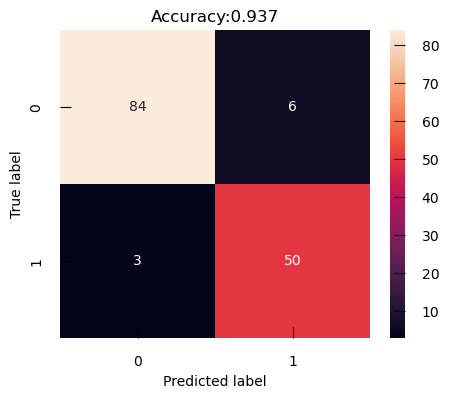

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix


y_cancer_test_pred = grid_cancer.predict(X_test_cancer)

# get the confusion matrix:
confusion_m_cancer = confusion_matrix(y_test_cancer, y_cancer_test_pred)

## recipe to plot the confusion matrix : 
plt.figure(figsize=(5,4))
sns.heatmap(confusion_m_cancer, annot=True)
plt.title(f'Accuracy:{accuracy_score(y_test_cancer,y_cancer_test_pred):.3f}')
plt.ylabel('True label')
plt.xlabel('Predicted label')


So, with its default threshold of 0.5, this model tends to produce more False Positive (ie. benign cancer seen as malignant), than False Negative (ie. malignant cancer seen as benign).

Depending on the particular of the problem we are trying to solve, that may be a desirable outcome.

Whatever the case, it is always interesting to explore a bit more : we will plot how each possible threshold affect the True Positive Rate and the False Positive Rate (**TPR and FPR**) : this is the Receiver Operating Characteristic c urve (**ROC curve**)

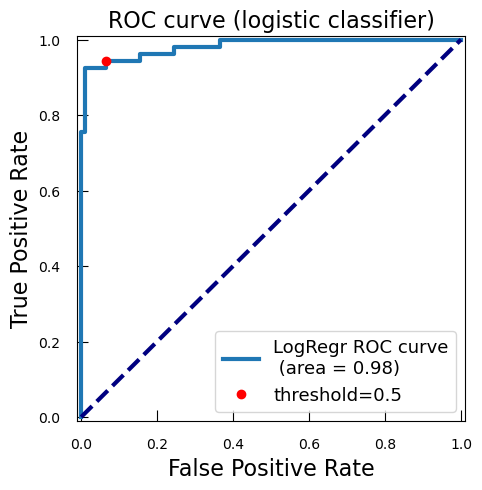

In [39]:
from scipy.special import expit
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# 1. the predict_proba gives you the probability in each class.
#       we want to have the probability of being of class 1 (malignant), so we take the second column
y_proba_lr_cancer = grid_cancer.predict_proba(X_test_cancer)[:,1]

#   for the logistic regression, that score is the logit, so can convert it back to 
#   probabilities with the expit function (which is the inverse of the logit)
#y_proba_lr_cancer = expit( y_score_lr_cancer )

# 2. this calculates the ROC curve : TPR and FPR for each threshold of score
fpr_lr_cancer, tpr_lr_cancer, threshold_cancer = roc_curve(y_test_cancer, y_proba_lr_cancer)

# we find the point corresponding to a 0.5 theshold
keep = np.argmin( np.abs( threshold_cancer - 0.5 ) )

# we compute the area under the ROC curve
roc_auc_lr_cancer = auc( fpr_lr_cancer, tpr_lr_cancer )

# 3. plotting 
plt.figure()
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr_cancer, tpr_lr_cancer, lw=3, label='LogRegr ROC curve\n (area = {:0.2f})'.format(roc_auc_lr_cancer))
plt.plot(fpr_lr_cancer[keep], tpr_lr_cancer[keep],'ro',label='threshold=0.5')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (logistic classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

So with this ROC curve, we can see how the model would behave on different thresholds.

**Question:** we have marked the 0.5 threshold on the plot. Where would a higher threshold be on the curve?

<br>

---

You can see that when plotting the ROC curve, I have also computed its "Area Under the Curve" : 
indeed ROC AUC is another common metric when doing classification.


For now, let's put this aside briefly to explore a very common problem in classification : imbalance


<br>

## Imbalanced dataset 

Let's use the same small example as before, but now instead of 300 sample of each class, imagine we only have 30 of class 1:

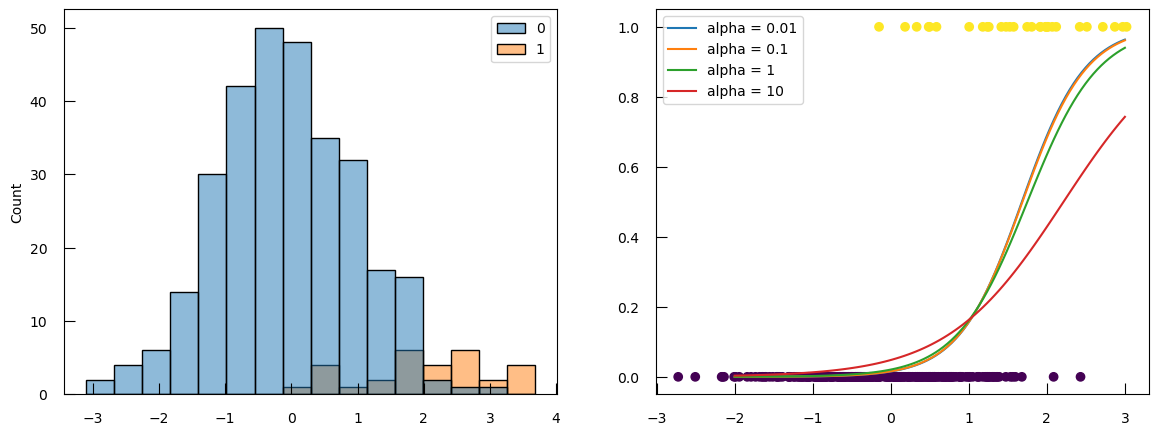

In [40]:
X1 = np.concatenate( [ np.random.randn(300) , np.random.randn(30)+2 ])
y = np.array( [0]*300 + [1]*30 )

# do not forget to scale the data
X1_norm = StandardScaler().fit_transform(X1.reshape( X1.shape[0] , 1 ))

fig,ax = plt.subplots(1,2, figsize = (14,5) )

sns.histplot( x=X1,hue = y , ax =ax [0])


ax[1].scatter( X1_norm , y , c = y )

for alpha in [0.01,0.1,1,10]:
    
    # this implementation does not take alpham but rather C = 1/alpha
    C = 1/alpha
    lr = LogisticRegression( penalty = 'l2' , C = C )
    lr.fit(X1_norm , y)
    
    proba = lr.predict_proba(np.linspace(-2,3,100).reshape(-1, 1))
    ax[1].plot( np.linspace(-2,3,100) , proba[:,1] , label = 'alpha = {}'.format(alpha) )
ax[1].legend()

You can see that now the point where the probability curves for different alpha converge is not 0.5 anymore...

Also, the probability says fairly low even at the right end of the plot.

In [41]:
y_predicted = lr.predict(X1_norm)
print( f"Accuracy with a threshold of 0.5 : {accuracy_score(y,y_predicted):.2f}"  )
pd.crosstab( y , y_predicted )

Accuracy with a threshold of 0.5 : 0.92


col_0,0,1
row_0,,
0,299,1
1,24,6


So, most of the class 1 samples are miss-classified (22/30), but we still get a very high accuracy...

That is because, by contruction, both the **logistic regression and accuracy score do not differentiate False Positive and False Negative**.

And the problem gets worse the more imbalance there is :

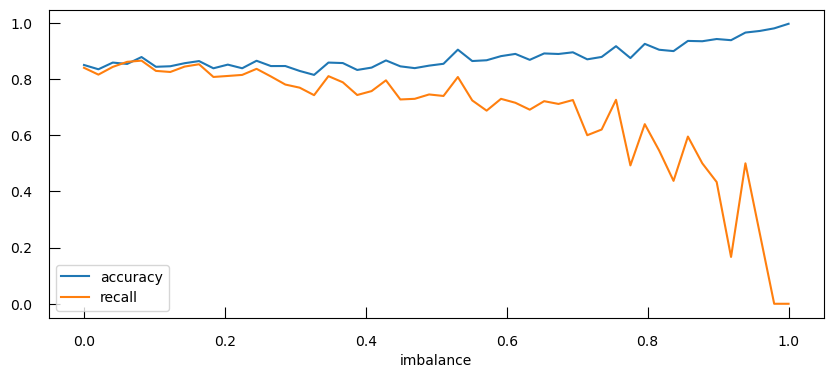

In [42]:
from sklearn.metrics import recall_score

## RECALL = TP / (TP + FN)

recall_list = []
acc_list = []

imbalance_list = np.linspace(0,1,50)

alpha = 1
for imbalance in imbalance_list:

    n0 = 300
    n1 = int( n0 * (1 - imbalance) )
    if n1 == 0:
        n1 = 1
    
    X1 = np.concatenate( [ np.random.randn(n0) , np.random.randn(n1)+2 ])
    y = np.array( [0]*n0 + [1]*n1 )

    X1_norm = StandardScaler().fit_transform(X1.reshape( X1.shape[0] , 1 ))
    
    C = 1/alpha
    lr = LogisticRegression( penalty = 'l2' , C = C )
    lr.fit(X1_norm , y)
    
    y_predicted = lr.predict(X1_norm)
    
    recall_list.append( recall_score( y , y_predicted ) )
    acc_list.append( accuracy_score(y,y_predicted) )

        
fig,ax=plt.subplots(figsize = (10,4))
ax.plot( imbalance_list , acc_list , label='accuracy' )
ax.plot( imbalance_list , recall_list , label='recall' )
ax.set_xlabel("imbalance")
ax.legend()

So not only does the precision get worse, the **accuracy actually gets higher as there is more imbalance!**

So the problem here may be 2-fold:
 * imbalance in our dataset skews the **logistic regression** toward a particular outcome
 * **accuracy** is not able to differenciate between False Positive and False Negative, and so it is **blind to imbalance**

Consequently, the solutions will have to come both from the model, and from the metric we are using.


**For the logistic regression**:
 * we will re-weight sample according to their class frequency, so that they are more important during the fitting.
 * in sklearn : `LogisticRegression( ... , class_weight='balanced')`
 
<br> 

**For the metric**, there exists several metrics which are sensitive to imbalance problems. 
Here we will introduce the **[balanced accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score)**:

$$balanced\_accuracy = 0.5*( \frac{TP}{TP+FN} + \frac{TN}{TN+FP} )$$

> Other scores you may want to look-up : [average-precision score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score), and [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score), which are both linked to the precision/recall curve


In [43]:
from sklearn.metrics import balanced_accuracy_score


def check_imbalance_effect( imbalance_list , class_weight = None):
    
    recall_list = []
    balanced_acc_list = []
    acc_list = []
    for imbalance in imbalance_list:

        n0 = 300
        n1 = int( n0 * (1 - imbalance) )
        if n1 == 0:
            n1 = 1

        X1 = np.concatenate( [ np.random.randn(n0) , np.random.randn(n1)+2 ])
        y = np.array( [0]*n0 + [1]*n1 )

        X1_norm = StandardScaler().fit_transform(X1.reshape( X1.shape[0] , 1 ))

        # LR
        lr = LogisticRegression( penalty = 'l2' , C = 1 , class_weight=class_weight)
        lr.fit(X1_norm , y)

        y_predicted = lr.predict(X1_norm)

        recall_list.append( recall_score( y , y_predicted )  )
        acc_list.append( accuracy_score(y,y_predicted) )
        balanced_acc_list.append( balanced_accuracy_score(y,y_predicted) )

    return recall_list , acc_list , balanced_acc_list

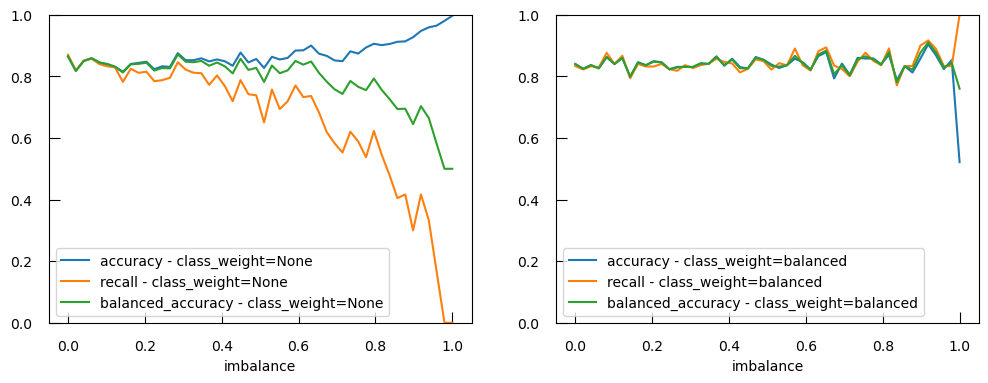

In [44]:
imbalance_list = np.linspace(0,1,50)

### first, we see what happens without class_weight=None

recall_list , acc_list , balanced_acc_list = check_imbalance_effect( imbalance_list , 
                                                               class_weight = None)
    
        
fig,ax=plt.subplots(1,2,figsize = (12,4))
ax[0].plot( imbalance_list , acc_list , label='accuracy - class_weight=None' )
ax[0].plot( imbalance_list , recall_list , label='recall - class_weight=None' )
ax[0].plot( imbalance_list , balanced_acc_list , label='balanced_accuracy - class_weight=None' )
ax[0].set_xlabel("imbalance")
ax[0].set_ylim(0,1)
ax[0].legend()
## now, with class weight 

recall_list , acc_list , balanced_acc_list = check_imbalance_effect( imbalance_list , 
                                                               class_weight = 'balanced')
            
ax[1].plot( imbalance_list , acc_list , label='accuracy - class_weight=balanced' )
ax[1].plot( imbalance_list , recall_list , label='recall - class_weight=balanced' )
ax[1].plot( imbalance_list , balanced_acc_list , label='balanced_accuracy - class_weight=balanced' )
ax[1].set_xlabel("imbalance")
ax[1].set_ylim(0,1)
ax[1].legend()

So, the **balanced accuracy** is able to detect an imbalance problem.

Setting `class_weight='balanced'` in our logistic regression fixes the imbalance at the level of the model.


<br>

## A few VERY IMPORTANT words on leakage

The most important part in all of the machine learning jobs that we have been presenting above, is that **the data set on which you train and the data set on which you evaluate your model should be clearly separated**(either the validation set when you do hyperparameter tunning, or test set for the final evaluation). 

No information directly coming from your test or your validation should pollute your train set. If it does you **loose your ablity to have a meaningful evaluation power.** 

In general **data leakage** relates to every bits of information that you should not have access to in a real case scenario, being present in your training set.

Among those examples of data leakage you could count : 
* **using performance on the test set to decide which algorithm/hyperparameter to use**
* doing imputation or scaling before the train/test split
* inclusion of future data points in a time dependent or event dependent model.



## Decision tree modeling : a (new?) loss function and new ways to do regularization

### Simple decision tree for classification

A simple **decision tree** reduces your problem into a **hierarchichal sequence of questions** on your features that can be answered by yes or no and which subdivides the data into 2 subgroups on which a new question is asked, and so on and so on.
![tree_ex](images/tree_ex.png)

Ok, but a huge number of trees can actually be built just by considering the different orders of questions asked. How does the algorithm deals with this?

Quite simply actually: it **tests all the features and chooses the most discriminative** (with respect to your target variable) : the feature where a yes or no question divides the data into 2 subsets which minimizes an **impurity measure**.

Imagine you have a dataset with feature color (red or blue) and feature shape (square or circle), and 2 target classes : 1 and 2.


![tree](images/Tree.png)

Asking `"feature color is red"` gives you the following subgroups:
 * 10 class 1, and 1 class 2 (`"feature color is red" == True`)
 * 2 class 1, and 11 class 2 (`"feature color is red" == False`)

Asking `"feature shape is square"` gives you:
 * 5 class 1, and 7 class 2 (`True`) 
 * 7 class 1 and 5 class 2 (`False`)
 
 So, you will prefer asking `"feature color is red?"` over `"feature shape is square?"`: `"feature color is red?"` is more discriminative.

For **categorical variables, the questions test for a specific category**.
For **numerical variables, the questions use a threshold** to as a yes/no question.  

The **threshold is, again, chosen to minimize impurity**. And in turn the best threshold for a variable is used to estimate the discriminativeness of that variable.

Of course, you will have to compute this threshold at each step of your tree since at each step you are considering different subdatasets.

---
The **impurity is related to how much your feature splitting is still having mixed classes**. So the impurity ends up giving a score: either it is a simple [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) or it is a [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient).

#### Shannon Entropy

$$Entropy = - \sum_{j} p_j log_2(p_j)$$

This measure is linked to information theory, where the information of an event occuring is the $log_2$ of this event's probability of occuring.
For purity, **0 is the best possible score, and 1 the worst**.

#### Gini coefficient

$$Gini = 1- \sum_{j} p_j^2$$

The idea is to measure the **probability that a dummy classifier mislabels your data**.
**0 is best, 1 is worst.**


--- 

We will generate some toy data to see how they work in practice:

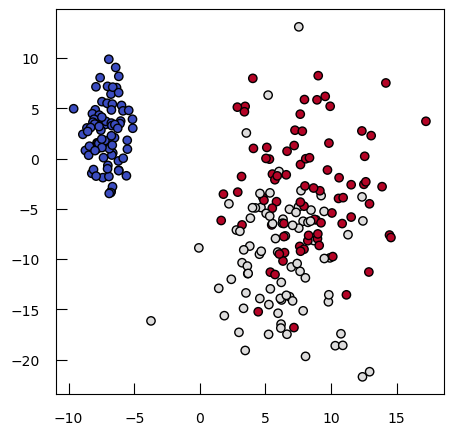

In [45]:
from sklearn.datasets import make_blobs
    
# 120 points, 3 blobs/clusters with some spread=3
blob_centers = np.array([[-7,2.5],[6,-10],[8,-3]])
blob_stds = [[1,3],[3,6],[3,6]]
X_3, y_3 = make_blobs(n_samples = 250, 
                      centers = blob_centers,
                      cluster_std = blob_stds, random_state = 42)

plt.scatter(X_3[:,0],X_3[:,1],c=y_3,cmap=plt.cm.coolwarm,edgecolors='k')

In [46]:
from sklearn.tree import DecisionTreeClassifier
## creating a decision tree with 1 parameter changed (more on that later)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_3, y_3)

DecisionTreeClassifier(max_depth=3)

In [47]:
pd.crosstab( tree.predict( X_3 ) , y_3 , rownames=['truth'] , colnames=['prediction'] )

prediction,0,1,2
truth,,,
0,84,0,0
1,0,73,32
2,0,10,51


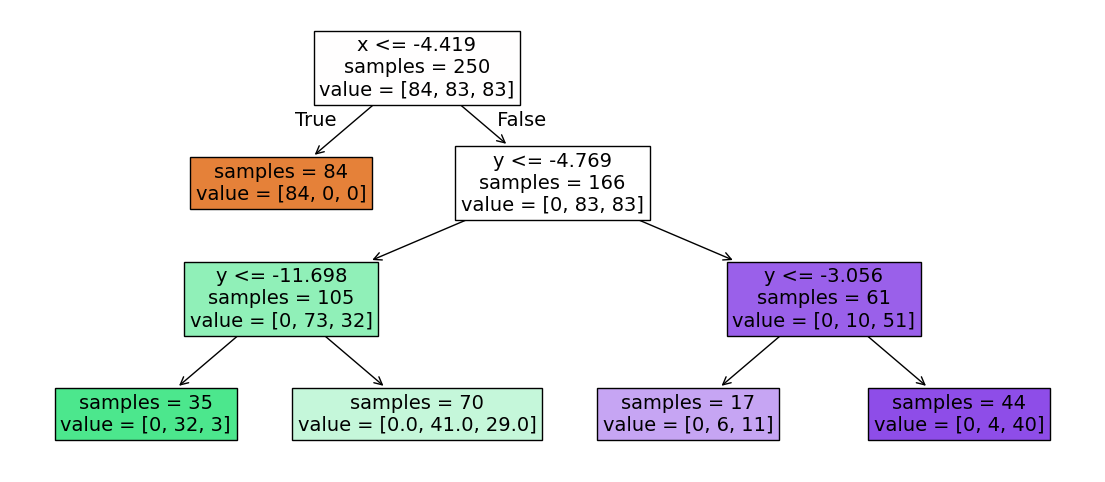

In [48]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(figsize=(14,6))

_ = plot_tree( tree , feature_names=['x','y'] , 
               fontsize=14 , filled=True , impurity=False , precision=3, ax=ax)

There are many parameters, but we will explore some of the main ones:

- `max_depth` : **Max Tree depth**: the maximum number of consecutive questions to ask
- `min_samples_split` : **Min Splitting of nodes**: minimum number of points to consider to make a new rule, outside of the leaves
- `min_samples_leaf` : **Min Splitting of leaves**: minimum number of points to consider to make a new rule, at the leaves

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def make_meshgrid(x, y, n=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    n: number of intermediary points (optional)

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    #                     np.arange(y_min, y_max, h))
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
                         np.linspace(y_min, y_max, n))
    return xx, yy

def contour_tree(X,y, n_estimators=1 , **kwargs):
    
    if n_estimators==1:
        model = DecisionTreeClassifier( **kwargs )
    else:
        model = RandomForestClassifier( n_estimators=n_estimators , **kwargs )
    
    model = model.fit(X, y) 

    # title for the plots
    title = 'Decision tree '+' '.join([f'{k}:{v}' for k,v in kwargs.items()])

    # Set-up 2x1 grid for plotting.
    fig, ax = plt.subplots(1,2,figsize=(15,8))
    
    # Set-up a grid of points to plot predictions
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax[0].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax[0].scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax[0].set_xlim(xx.min(), xx.max())
    ax[0].set_ylim(yy.min(), yy.max())
    ax[0].set_title(title)
        
#     plt.show()
#     fig,ax = plt.subplots(figsize=(15,7))
    if n_estimators == 1:
        _ = plot_tree( model , feature_names=['x','y'] , 
                   fontsize=10 , filled=True , impurity=False , precision=3, ax=ax[1])
    plt.show()
    return


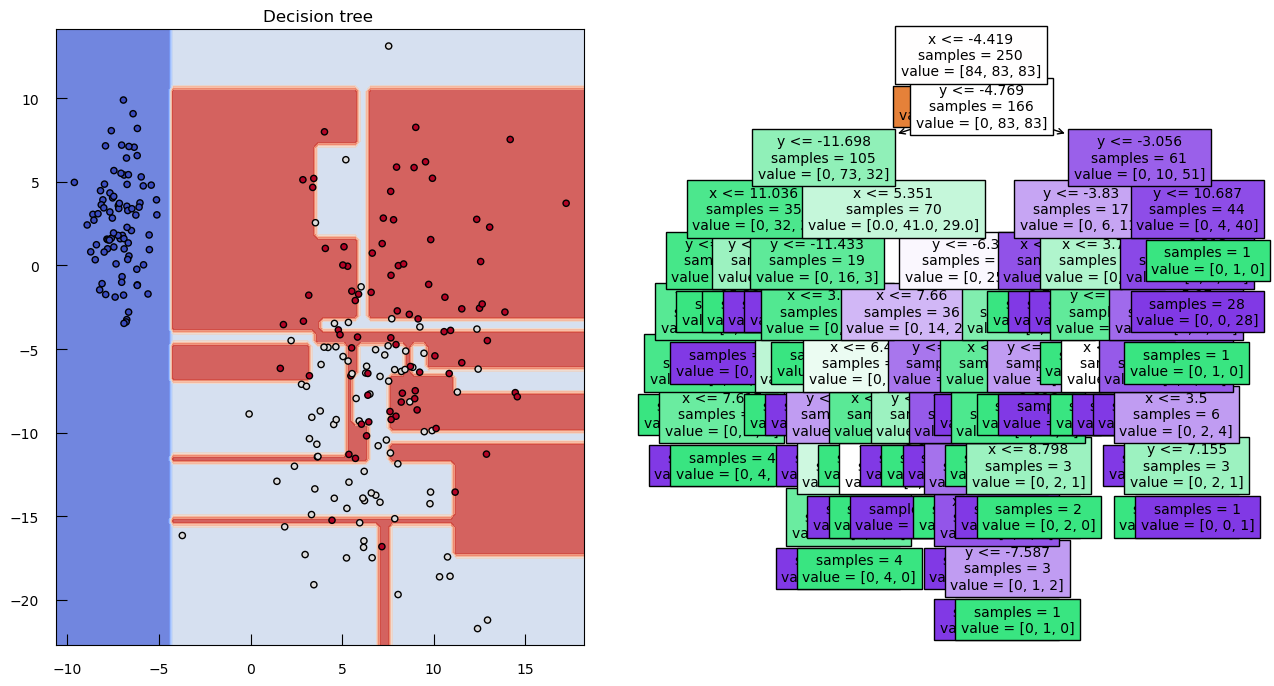

In [50]:
contour_tree(X_3,y_3)

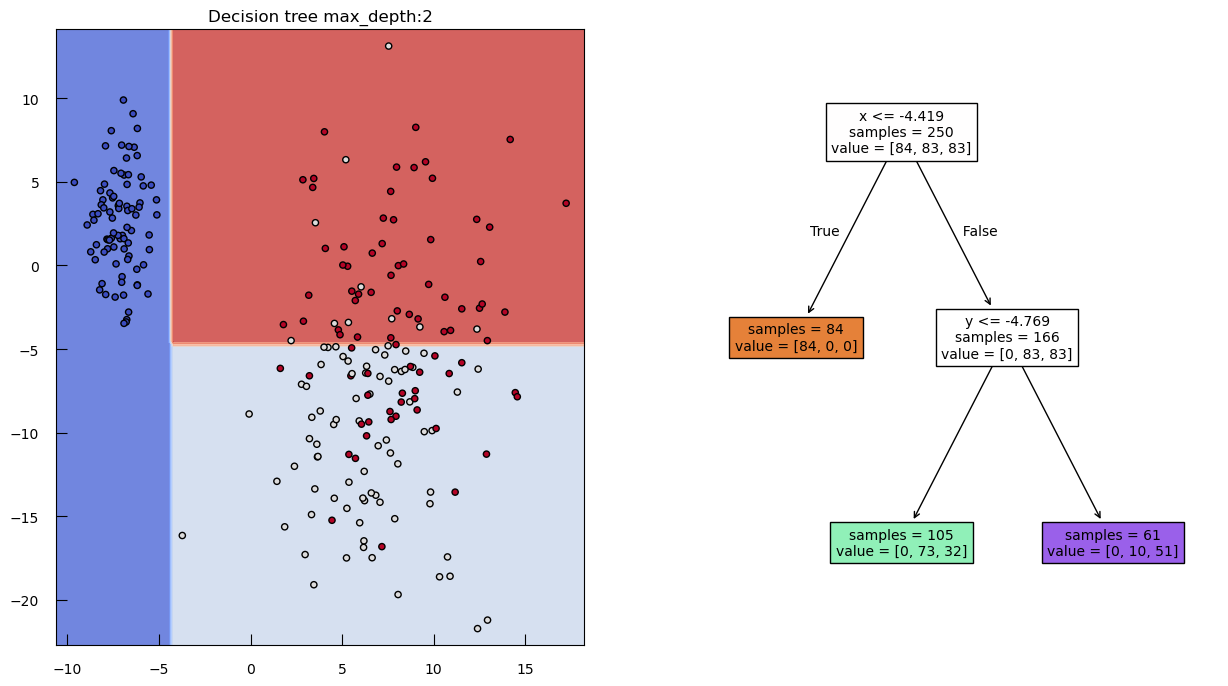

In [51]:
contour_tree(X_3,y_3 , max_depth = 2)

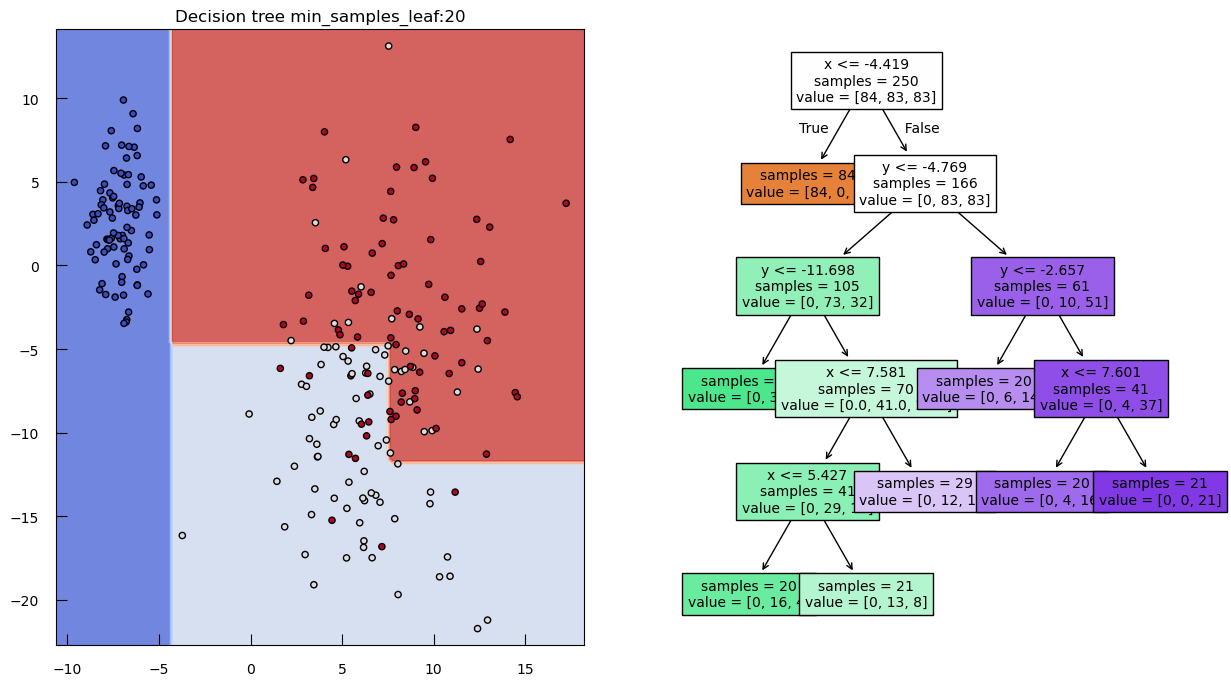

In [52]:
contour_tree(X_3,y_3 , min_samples_leaf = 20)

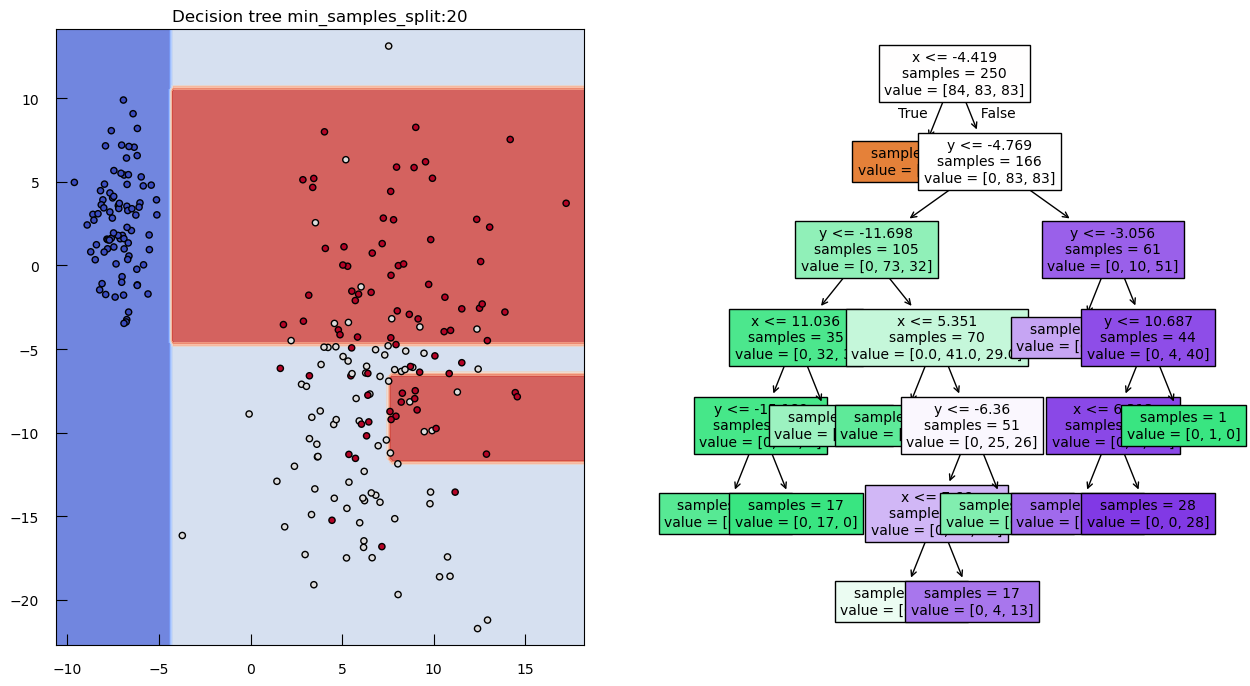

In [53]:
contour_tree(X_3,y_3 , min_samples_split = 20)

There are 3 main advantages to this kind of methods:
* it works with all types of feature
* you don't need to rescale
* it already includes non linear fitting

**Moreover it is 'easy' to interpret.**

But....(yes there is a but, there is no free lunch)

Even with all of those hyperparamaters **they are still not great on new data (inaccuracy...).** 

We will see that in the real data example below and we will see more powerful technics based on decision tree that are more costly but generalize better.

#### Single decision tree pipeline

In [54]:
%%time
from sklearn.tree import DecisionTreeClassifier

grid_values = {'criterion': ['entropy','gini'],
               'max_depth':np.arange(2,10),
               'min_samples_split':np.arange(2,12,2)}

grid_tree = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), 
                                param_grid = grid_values, 
                                scoring='roc_auc',
                                cv = 5,
                                n_jobs=-1)
grid_tree.fit(X_train_cancer, y_train_cancer)

print(f'Grid best score (accuracy): {grid_tree.best_score_:.3f}')
print('Grid best parameter :')

for k,v in grid_tree.best_params_.items():
    print('{:>25}\t{}'.format(k,v))

Grid best score (accuracy): 0.954
Grid best parameter :
                criterion	entropy
                max_depth	3
        min_samples_split	10
CPU times: user 190 ms, sys: 333 μs, total: 191 ms
Wall time: 485 ms


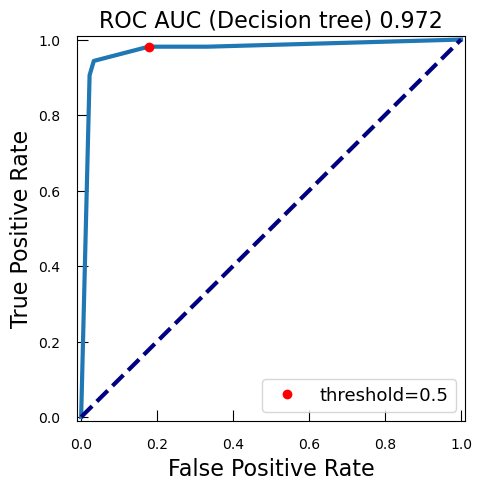

In [55]:
from sklearn.metrics import roc_curve
y_test_score=grid_tree.predict_proba(X_test_cancer)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_cancer, y_test_score)

keep = sum( thresholds > 0.5 ) - 1 # trick to find the index of the last threshold > 0.5

y_test_roc_auc = grid_tree.score(X_test_cancer,y_test_cancer)

plt.figure()
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3)
plt.plot(fpr[keep], tpr[keep],'ro',label='threshold=0.5')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title(f'ROC AUC (Decision tree) {y_test_roc_auc:.3f}', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

Trees do not have coefficients like the logistic regression, but they still have a feature importance metric which is computed from how much each feature reduce impurity. 

In [56]:
w_tree=grid_tree.best_estimator_.feature_importances_

sorted_features=sorted([[breast_cancer_df.columns[i],abs(w_tree[i])] for i in range(len(w_tree))],
                       key=lambda x : x[1],
                       reverse=True)

print('Features sorted per importance in discriminative process')
for f,w in sorted_features:
    if w == 0:
        break
    print('{:>25}\t{:.4f}'.format(f,w))

Features sorted per importance in discriminative process
      mean concave points	0.7770
                mean area	0.0980
           mean perimeter	0.0646
             mean texture	0.0605
              mean radius	0.0000


And we can even plot the model:

Text(0.5, 1.0, 'best single decision tree')

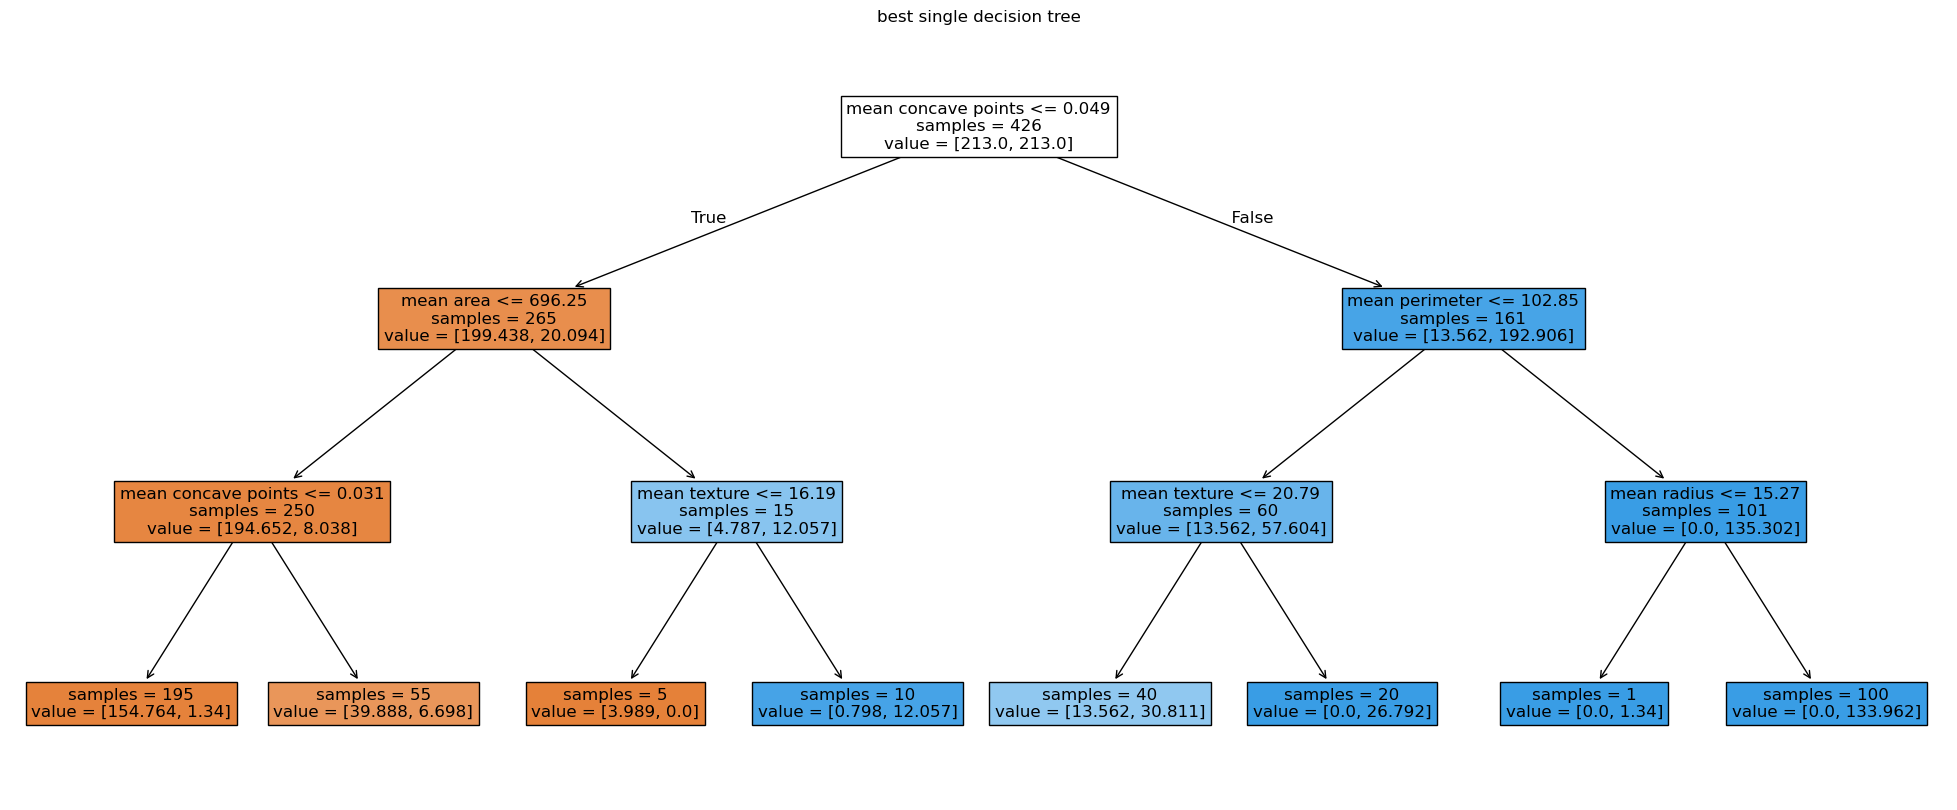

In [57]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(figsize=(25,10))
plot_tree( grid_tree.best_estimator_ , 
          feature_names=breast_cancer_df.columns , 
          ax=ax , fontsize=12 , filled=True , impurity=False , precision=3)
ax.set_title('best single decision tree')

<br>


## Random Forests for classification

the Random Forest algorithm relies on two main concepts : 
1. **randomly producing/training many different trees**
2. **agglomerating the predictions** of all these trees (mainly averaging)


The randomness between trees concerns:
* **[bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) of the training dataset**
* using only a **random subset of features**


**Bootstrapping:** sampling methods in which you randomly draw a subsample from your data, *with replacement*. The created replicate is the same size as the original distribution.

I am sure you can see intuitively how that is going to help generalization of our model.

So now on top of all the parameters seen before to create each individual trees of the forest, you also have a parameter controlling the number of trees in your forest.

![RF](images/RF.png)

**In the following plots I am plotting the result for a random forest algorithm and compare it to a single decision tree sharing the same hyperparameters value than the one used in the random forest**.




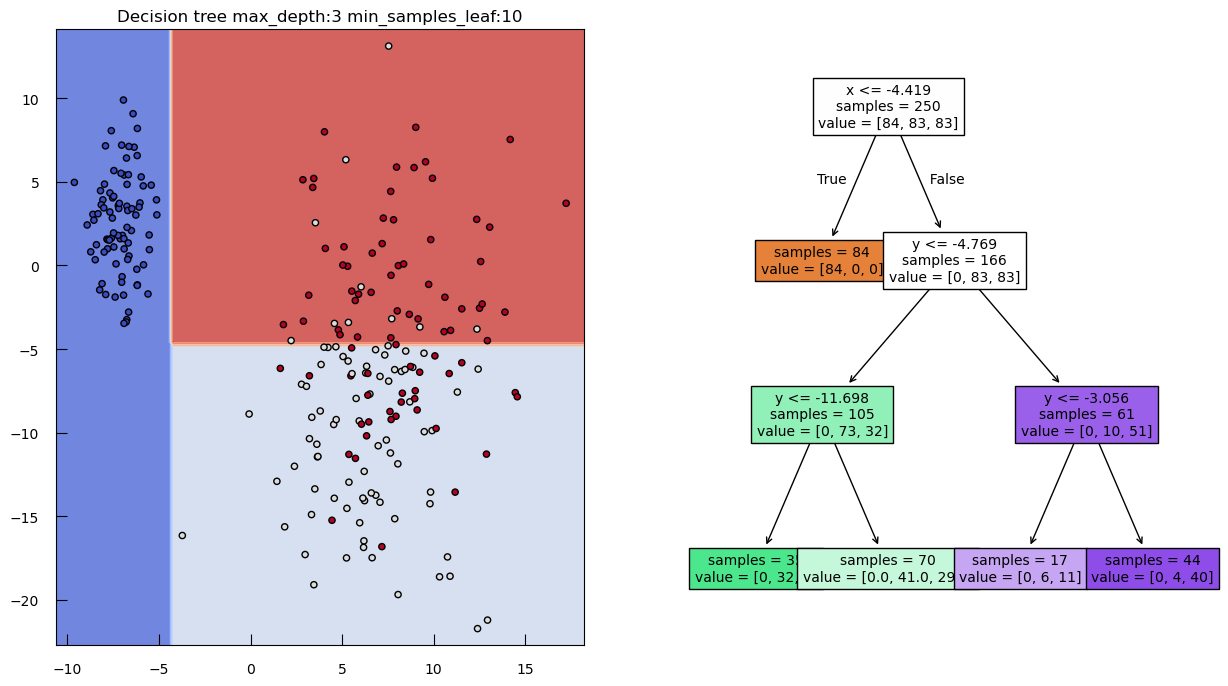

In [58]:
## single tree
contour_tree(X_3,y_3 , 
             max_depth = 3,
             min_samples_leaf = 10)

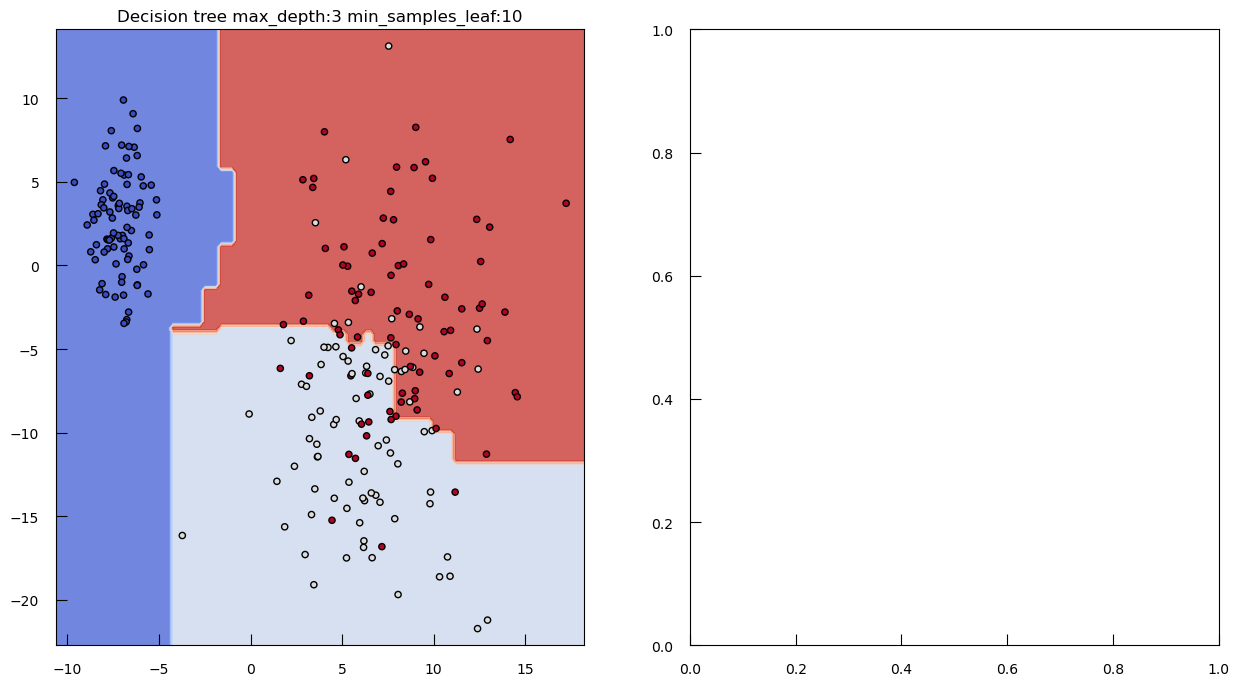

In [59]:
## 10 random trees
contour_tree(X_3,y_3 , 
             max_depth = 3,
             min_samples_leaf = 10,
             n_estimators=10)

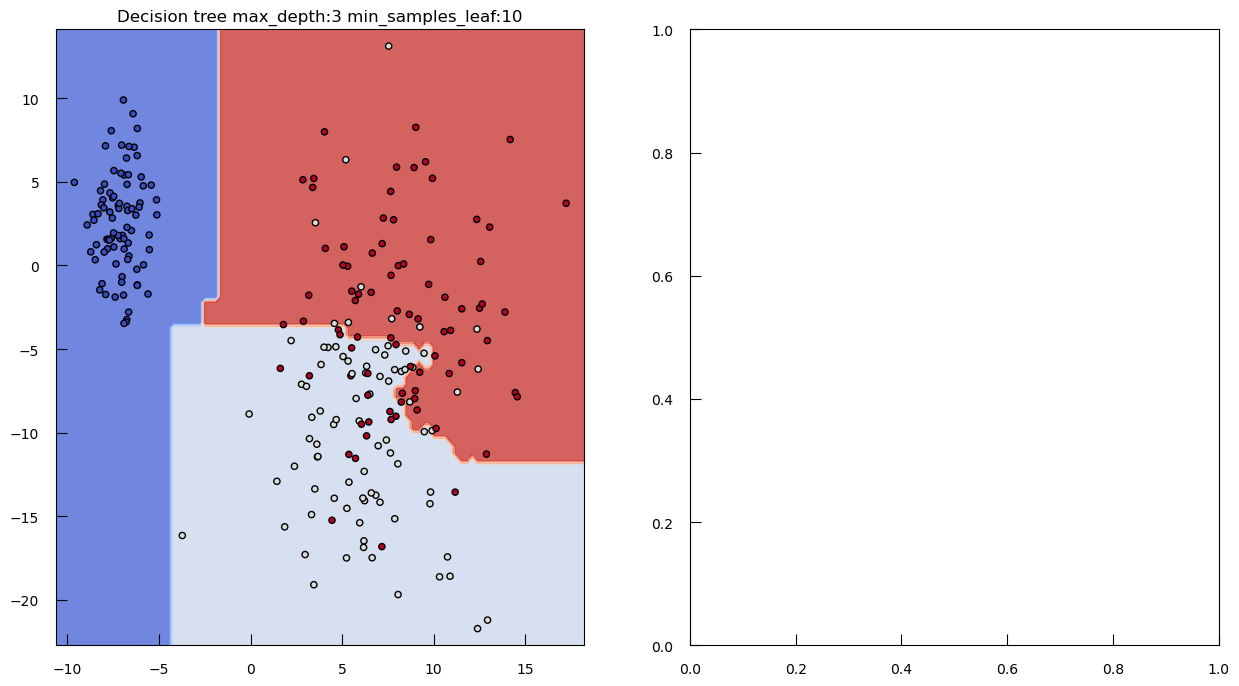

In [60]:
## 100 random trees
contour_tree(X_3,y_3 , 
             max_depth = 3,
             min_samples_leaf = 10,
             n_estimators=100)

### Exercise: Random Forest on the breast cancer dataset

Train a random forest on the breast cancer dataset.

Use an hyper-parameter space similar to the one we used for single decision trees with the number of trees (`n_estimator`) added to it.

**computational considerations**: to limit the training time to around 1 minute, only test 5 values of `n_estimators`, all below 500.

correction:

In [61]:
%%time


from sklearn.ensemble import RandomForestClassifier

grid_values = {'n_estimators' : [10,50,100,150,200], 
               'criterion': ['entropy','gini'],
               'max_depth':np.arange(2,10), ## I reduce the search space in the interest of time too
               'min_samples_split':np.arange(2,12,2)}

grid_tree = GridSearchCV(RandomForestClassifier(class_weight='balanced'), 
                                param_grid = grid_values, 
                                scoring='roc_auc',
                                cv = 5,
                                n_jobs=-1)
grid_tree.fit(X_train_cancer, y_train_cancer)

print(f'Grid best score (accuracy): {grid_tree.best_score_:.3f}')
print('Grid best parameter :')

for k,v in grid_tree.best_params_.items():
    print('{:>25}\t{}'.format(k,v))

Grid best score (accuracy): 0.986
Grid best parameter :
                criterion	entropy
                max_depth	7
        min_samples_split	6
             n_estimators	100
CPU times: user 3.08 s, sys: 171 ms, total: 3.25 s
Wall time: 1min 38s


/home/wandrille/Installed_software/anaconda3/envs/introML2024/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


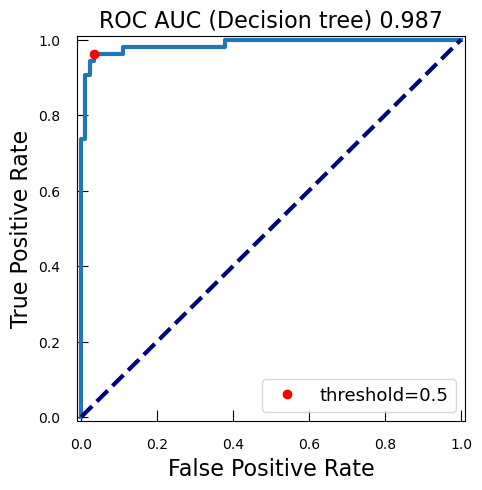

In [62]:
from sklearn.metrics import roc_curve
y_test_score=grid_tree.predict_proba(X_test_cancer)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_cancer, y_test_score)

keep = sum( thresholds > 0.5 ) - 1 # trick to find the index of the last threshold > 0.5

y_test_roc_auc = grid_tree.score(X_test_cancer,y_test_cancer)

plt.figure()
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3)
plt.plot(fpr[keep], tpr[keep],'ro',label='threshold=0.5')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title(f'ROC AUC (Decision tree) {y_test_roc_auc:.3f}', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

Trees do not have coefficients like the logistic regression, but they still have a feature importance metric which is computed from how much each feature reduce impurity. 

In [63]:
w_tree=grid_tree.best_estimator_.feature_importances_

sorted_features=sorted([[breast_cancer_df.columns[i],abs(w_tree[i])] for i in range(len(w_tree))],
                       key=lambda x : x[1],
                       reverse=True)

print('Features sorted per importance in discriminative process')
for f,w in sorted_features:
    if w == 0:
        break
    print('{:>25}\t{:.4f}'.format(f,w))

Features sorted per importance in discriminative process
      mean concave points	0.3089
           mean concavity	0.1749
           mean perimeter	0.1352
                mean area	0.1168
              mean radius	0.0915
             mean texture	0.0602
         mean compactness	0.0458
          mean smoothness	0.0310
   mean fractal dimension	0.0178
            mean symmetry	0.0178


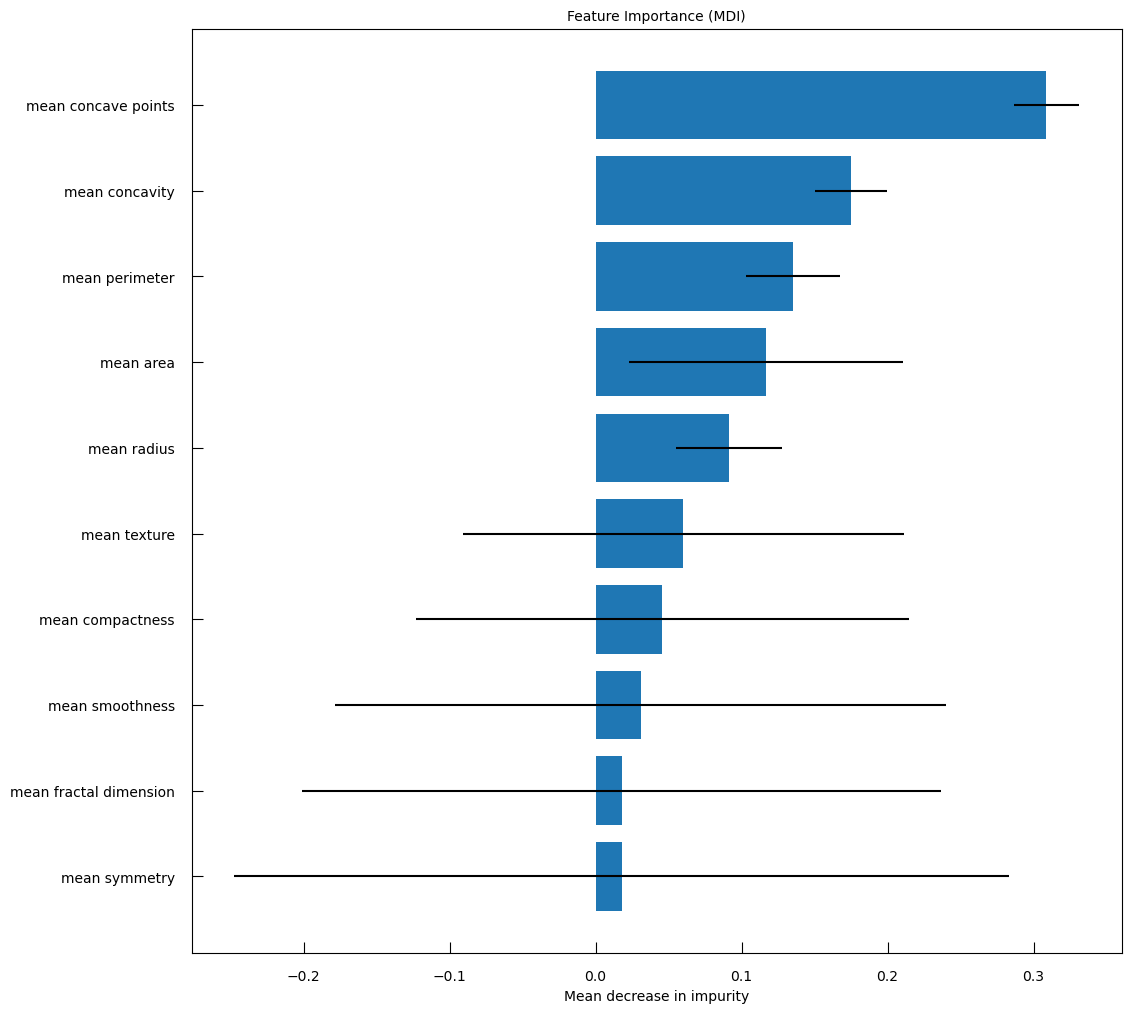

In [64]:
feature_importance = grid_tree.best_estimator_.feature_importances_

## by gathering the importance accross each individual tree, we can access 
## the standard deviation of this importance
feature_importance_std = np.std([tree.feature_importances_ for tree in grid_tree.best_estimator_.estimators_], 
                       axis=0)

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 12))


plt.barh(pos, feature_importance[sorted_idx],xerr=feature_importance_std[sorted_idx][::-1], align='center')
plt.yticks(pos, breast_cancer_df.columns[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)
plt.xlabel("Mean decrease in impurity")
plt.show()

#### RF annex 1: too many features

Modern biological dataset using high-throughput technologies can now provide us with measurements for hundreds or even thousands of features (e.g., proteomics, RNAseq experiments).
But it is often the case that among these thousands of features, only a handful are truly informative (the so-called biomarkers for example).

While they generally are very good methods, Random Forest can sometime struggle in this context. 
Let's try to understand why with a synthetic example:


We start with a simple case : 2 categories, perfectly separable using 2 features:

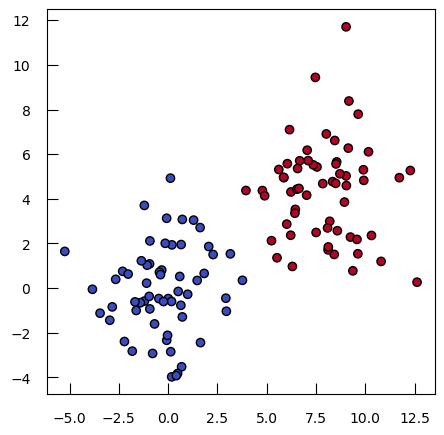

In [65]:
from sklearn.datasets import make_blobs
    
# 120 points, 2 blobs/clusters with some spread=3
blob_centers = np.array([[0,0],[8,4]])
blob_stds = [[2,2],[2,2]]
X_2, y_2 = make_blobs(n_samples = 120, 
                      centers = blob_centers,
                      cluster_std = blob_stds, random_state = 42)

plt.scatter(X_2[:,0],X_2[:,1],c=y_2,cmap=plt.cm.coolwarm,edgecolors='k')

Let's see how a single decision tree and a random forest do in this situation:

In [66]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)

In [67]:
from sklearn.model_selection import cross_val_score

print("decision tree cross-validated accuracy:" , cross_val_score( dt , X_2 , y_2 ) )
print("random forest cross-validated accuracy:" , cross_val_score( rf , X_2 , y_2 ) )

decision tree cross-validated accuracy: [1.         1.         0.95833333 1.         0.95833333]
random forest cross-validated accuracy: [1.         1.         1.         1.         0.95833333]


We can see that they both perform very well, perhaps even better in the case of the random forest (it is able to find more generalizable separation rules thanks to the ensembling).

Now, we are going to add many new features filled with random data (imagine they are the 99% of genes which are not biomarkers):

In [68]:
nb_noise = 10**4
X_2_noise = np.concatenate( [ X_2 , np.random.randn( X_2.shape[0],nb_noise ) ] , axis = 1)

In [69]:
print("decision tree cross-validated accuracy:" , cross_val_score( dt , X_2_noise , y_2 ) )
print("random forest cross-validated accuracy:" , cross_val_score( rf , X_2_noise , y_2 ) )

decision tree cross-validated accuracy: [1.         1.         0.95833333 1.         0.95833333]
random forest cross-validated accuracy: [0.66666667 0.45833333 0.54166667 0.70833333 0.625     ]


The performance of the **single decision tree is unchanged**,

but the **Random Forest performs way worse**!


**Question:** how can we explain this difference?


---

**Solution and discussion:**

Remember that each tree in the forest only sees a random fraction of the features.

As the number of "noise" features increases, the probability that any tree will get the combination of informative features  diminishes.

Furthermore, the trees which see only noise also contribute some (uninformative) vote to the overall total.

Thus it becomes harder to extract the signal from the noise in the data. 


While this could be solved by increasing the number of trees. 
It is often also advisable to perform some sort of **feature selection** to make sure you only present features of interest to the model.

There are many procedures to do this, and none of these techniques are perfect however but, just to cite a few:

 * select the X features which show the most differences between categories
 * use PCA and limit yourself to the first few principal components
 * use a reduced set of features externally defined with experts
 * test random sets of features (but this is also very computationaly demanding)
 * see the [feature selection page of sklearn](https://scikit-learn.org/stable/modules/feature_selection.html) 





In [70]:
## simple example with a selectKBest 
##  which will select the features with the highest ANOVA F-value between feature and target.
from sklearn.feature_selection import SelectKBest


ppl = Pipeline([('select' , SelectKBest( k = 100 ) ) , ## we will select 100 features, which is way to much here
                ('tree' , RandomForestClassifier(n_estimators=100))  ])

print("select 100 best > RF cross-validated accuracy:" , cross_val_score( ppl , 
                                                                         X_2_noise , 
                                                                         y_2 , 
                                                                         scoring='accuracy') )


select 100 best > RF cross-validated accuracy: [0.95833333 0.95833333 1.         1.         0.95833333]



#### RF annex 2 : OOB metric

In addition to the k-fold cross-validation that we have used so far, random forests offer the possibility of estimating generalization performance with **"Out-Of-Bag" scoring**.

"out-of-bag" refers to the fact that each tree in the forest is trained with a subset of the samples which are "in-the-bag": the samples it does not train with are thus "out-of-bag".

The OOB error is computed by aggregating the error for each instance when it is predicted only with the trees where is an out-of-bag sample.

OOB error has been shown to converge to leave-one-out cross-validation error when the number of trees is large enough, making it an interesting metric of generalizability.

It is particularly useful because it can be computed on a single random forest as it is being trained.

Thus, were k-fold cross-validation would require you to train $k$ models, with OOB error you only have to train 1, and thus you save a lot of compute time.


In [71]:
%%time
rf1 = RandomForestClassifier(class_weight='balanced' , 
                             n_estimators=100 , 
                             max_depth=5,
                             min_samples_split=10 , 
                             oob_score= True )
rf1.fit( X_train_cancer, y_train_cancer )
rf1.oob_score_

CPU times: user 195 ms, sys: 67 μs, total: 195 ms
Wall time: 194 ms


0.9225352112676056

In [72]:
%%time
from sklearn.model_selection import LeaveOneOut
S = cross_val_score( rf1 , X_train_cancer , y_train_cancer , scoring = 'accuracy' , cv = LeaveOneOut() )
S.mean()

CPU times: user 1min 16s, sys: 366 ms, total: 1min 17s
Wall time: 1min 17s


np.float64(0.9295774647887324)

See also this example about [plotting OOB error](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html)


<br>

## Random Forest in regression. <a class="anchor" id="rf-r"></a>

From the standpoint of tree, the only difference is that now, instead of the entropy or Gini criterion, **the decision which variable to use at any node is made using a regression metric**, such as squared error for example.

For example, consider this example of [regression with a single tree](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html), adapted from the sklearn website:

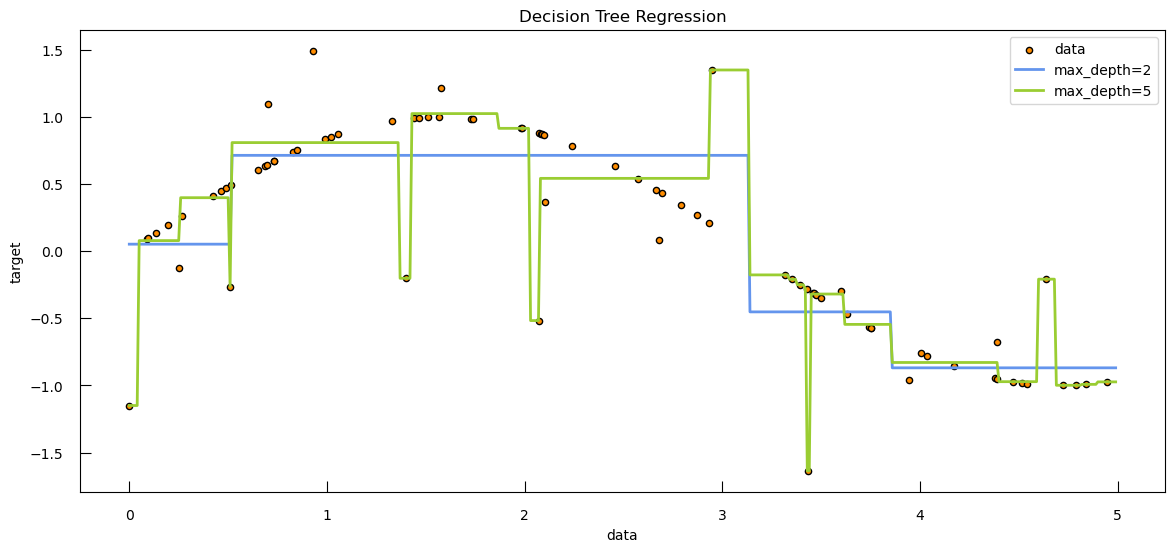

In [73]:
from sklearn.tree import DecisionTreeRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16)) # adding additional noise to some of the points

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize = (14,6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


Text(0.5, 1.0, 'best single decision tree')

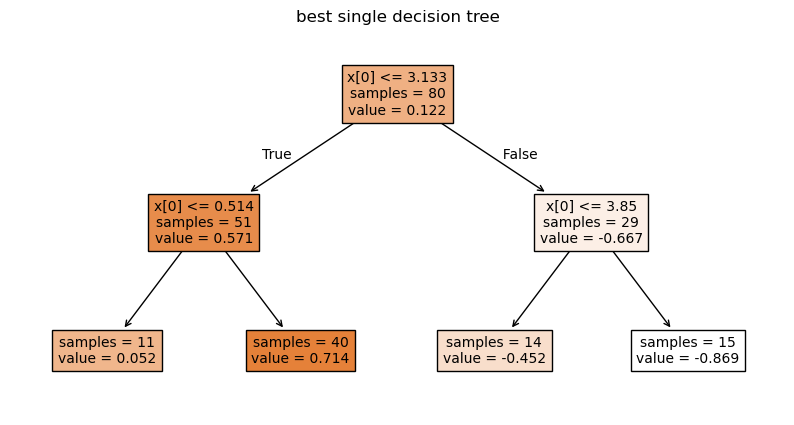

In [74]:
fig,ax = plt.subplots(figsize=(10,5))
plot_tree( regr_1 , 
          ax=ax , fontsize=10 , filled=True , impurity=False , precision=3)
ax.set_title('best single decision tree')

Of course with a single tree you do not get very far, unless the tree becomes absolutely huge. 

But with a random forest you can aggregate the estimate from many trees to get somewhere nice.

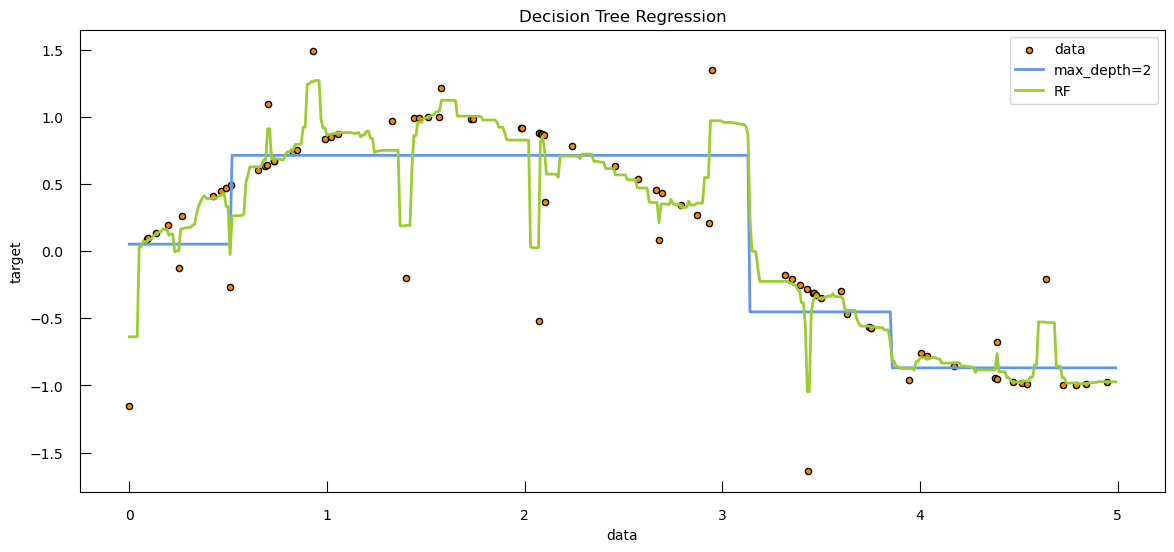

In [75]:
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor(n_estimators=100 )
RFReg.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_rf = RFReg.predict(X_test)

# Plot the results
plt.figure(figsize = (14,6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_rf, color="yellowgreen", label="RF", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



With a bit of leg-work, we can even grab the inidividual trees predictions to build an interval around the random forest prediction: 

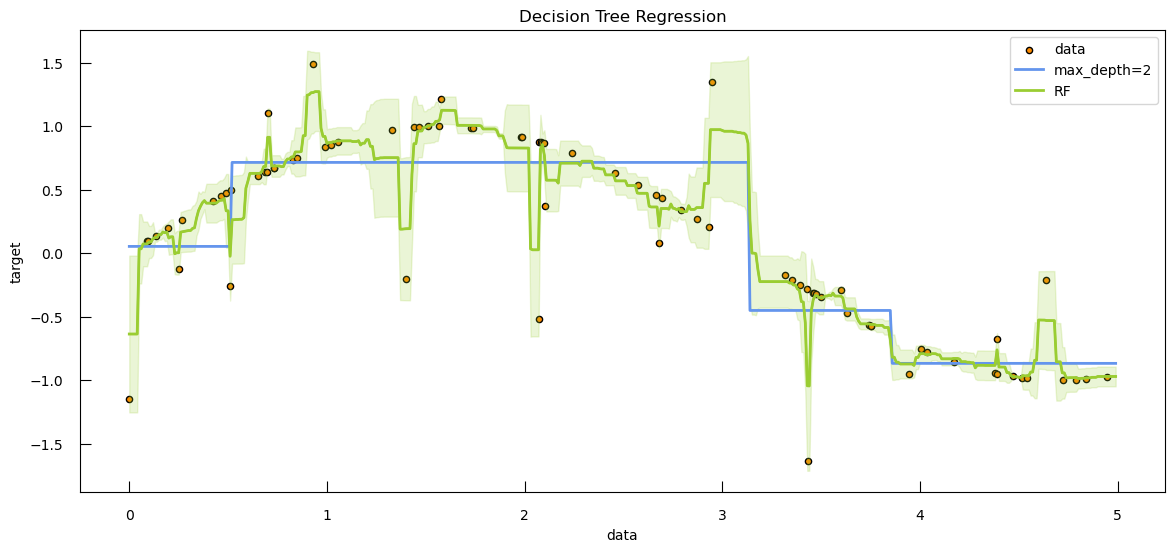

In [76]:

## collecting prediction from all individual trees in a big list
y_pred = []
x_pred = []
for tree in RFReg.estimators_ :
    y_pred += list( tree.predict(X_test) )
    x_pred += list(X_test[:,0])


plt.figure(figsize = (14,6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_rf, color="yellowgreen", label="RF", linewidth=2)
sns.lineplot(x=x_pred , y=y_pred , color="yellowgreen" , errorbar = 'sd') 
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


Let's try on the potato data:

In [77]:
## full dataset
X = dfTT
y = df[ "Flesh Colour"]

#We start by splitting our data in a train and a test set


X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2)

print('train set size:',len(y_train))
print(' test set size:',len(y_test))

train set size: 68
 test set size: 18


In [78]:
%%time
from sklearn.ensemble import RandomForestRegressor

## when it comes to criterion, we can now choose:
# * “squared_error” (default) for the mean squared error, minimizes the L2 loss
#                                           using the mean of each terminal node,
# * “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits
# * “absolute_error” for the mean absolute error, which minimizes the L1 loss
#                                           using the median of each terminal node,
# * “poisson” which uses reduction in Poisson deviance to find splits.
#
# let's try squared error and absolute error

grid_values = {'criterion': ['squared_error' , 'absolute_error'],
               'n_estimators':[500], 
               'max_depth':[10,15,20],
               'min_samples_split':np.arange(2,12,2)}

grid_RF = GridSearchCV(RandomForestRegressor(),
                        param_grid = grid_values, 
                        scoring='r2',n_jobs=-1,cv=5)

grid_RF.fit(X_train, y_train)


print(f'Grid best score (r2): {grid_RF.best_score_:3f}')
print('Grid best parameter (max. r2): ')

for k , v in grid_RF.best_params_.items():
    print(f'{k:>20} : {v}')

/home/wandrille/Installed_software/anaconda3/envs/introML2024/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Grid best score (r2): 0.528490
Grid best parameter (max. r2): 
           criterion : absolute_error
           max_depth : 10
   min_samples_split : 2
        n_estimators : 500
CPU times: user 9.3 s, sys: 117 ms, total: 9.42 s
Wall time: 2min 43s


In [79]:
print(f'Grid best parameter (max. r2) model on test: {grid_RF.score(X_test,y_test):.3f}')

Grid best parameter (max. r2) model on test: 0.613


In [80]:
feature_importance = grid_RF.best_estimator_.feature_importances_

sorted_features=sorted([[X_train.columns[i],abs(feature_importance[i])] for i in range(len(feature_importance))],
                       key= lambda x : x[1],
                       reverse=True)

print('Features sorted per importance in discriminative process')
for f,w in sorted_features:
    print('{:>20}\t{:.3f}'.format(f,w))

Features sorted per importance in discriminative process
                 155	0.104
                 127	0.073
                  58	0.032
                 165	0.026
                 197	0.025
                   6	0.024
                  62	0.020
                 148	0.019
                 112	0.019
                  44	0.018
                  21	0.015
                   5	0.014
                 152	0.013
                 103	0.011
                 128	0.011
                  53	0.011
                 187	0.010
                  77	0.010
                  24	0.010
                  67	0.010
                  55	0.010
                 146	0.010
                  20	0.009
                 193	0.009
                 182	0.008
                  59	0.008
                 102	0.008
                  84	0.008
                  43	0.007
                  81	0.007
                  26	0.007
                 137	0.007
                 184	0.007
                  30	0.007
                  74	0.00

Tree-based techniques are interesting because:
 * they do not necessitate scaling
 * they give interpretable models and results
 * they model arbitrary non-linear problems
 
However as you have seen they tend to take longer to train...

[back to the ToC](#toc)
    
# Conclusion <a id='conclusion'></a>

During this notebook we have only given a whirlwind tour of what ML is and what is it about.

We have of course only mentionned a handful of the numerous algorithms that can be used, both for [classification and for regression](https://scikit-learn.org/stable/supervised_learning.html) (NB: this link is not an exhaustive list, just what has been implemented in the sklearn library).

However, more than a collection of algorithm, Machine Learning should also be seen as a set of methods to solve some important statistical problems :
 * **regularization** parameters (such as l1 or l2 norm, or max depth), to handle **overfitting**
 * **cross-validation** strategies, to detect **overfitting** and handle **model-selection**
 * **adapted metrics** to handle the specific of our goal and our data (handle imbalance for example).
   * [classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
   * [regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)


<br>

# Classification exercise : predicting heart disease on the framingham data-set

Use everything you have learned to model and predict the column `'TenYearCHD'` (dependent variable : ten year risk of coronary heart disease).

In [87]:
df_heart=pd.read_csv('https://raw.githubusercontent.com/sib-swiss/statistics-and-machine-learning-training/refs/heads/main/data/framingham.csv', index_col = 0)

df_heart.dropna(axis=0,inplace=True) # removing rows with NA values.

print(df_heart.shape)
df_heart.head()

(3658, 15)


,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [88]:
##separation in X and y
X_heart = df_heart.drop( columns = "TenYearCHD" )
y_heart = df_heart[ "TenYearCHD" ]


In [89]:
X_heart.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,,,,,,,,,,,,,,
1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


Correction

fraction of class benign in train 0.15238789646372586
fraction of class benign in test  0.15191256830601094
fraction of class benign in full  0.15226899945325315
Grid best score (balanced_accuracy):  0.6629812336905225
Grid best parameter (max.balanced_accuracy):  {'model__C': np.float64(0.05590810182512223), 'model__penalty': 'l1', 'poly__degree': 1}
Grid best score (balanced_accuracy):  0.6324393426239521
Grid best parameter (max. balanced_accuracy):  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 100}
Grid best parameter (max.balanced_accuracy) model on test:  0.6787111547875102
Important features
	                           age	0.502
	                         sysBP	0.305
	                    cigsPerDay	0.243
	                       glucose	0.169
	                  prevalentHyp	0.086
	                     heartRate	0.065
	                 currentSmoker	0.058
	               prevalentStroke	0.048
	                           

/tmp/ipykernel_650127/166564413.py:147: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot( x='y_true',


<Axes: xlabel='y_true', ylabel='proba_class1'>

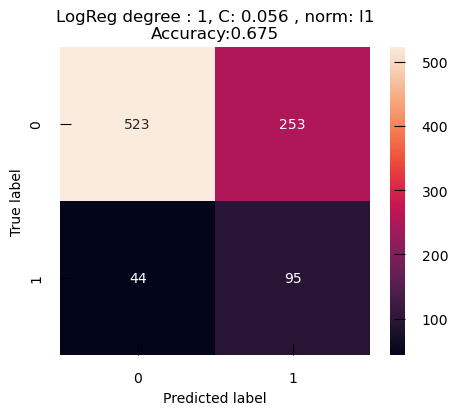

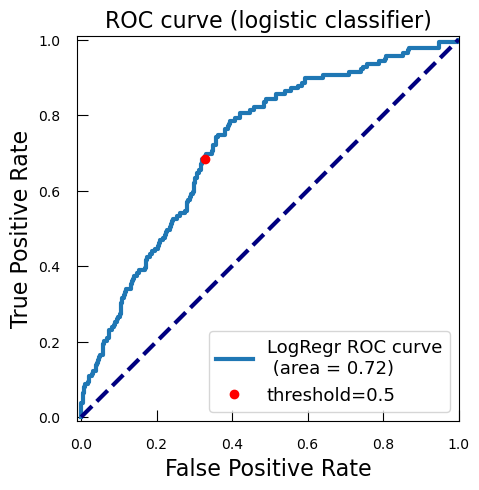

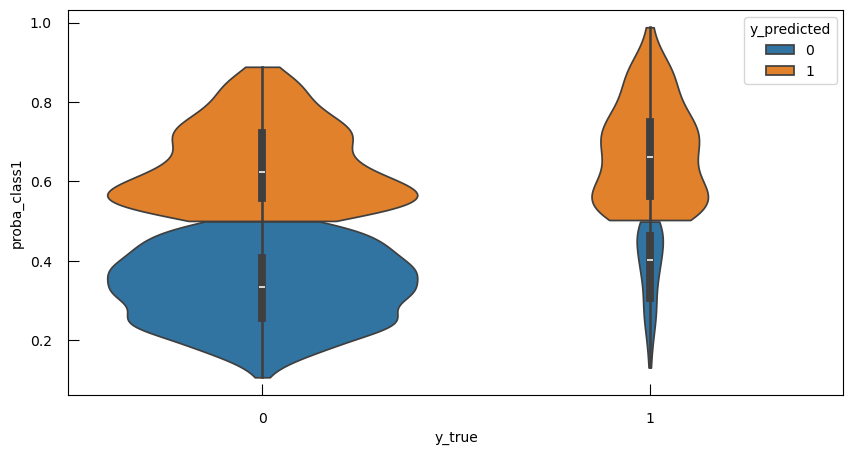

In [92]:
from sklearn.preprocessing import PolynomialFeatures

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart,y_heart,
                                                   random_state=123456,stratify=y_heart)
#stratify is here to make sure that you split keeping the repartition of labels unaffected

print("fraction of class benign in train",sum(y_train_heart)/len(y_train_heart))
print("fraction of class benign in test ",sum(y_test_heart)/len(y_test_heart))
print("fraction of class benign in full ",sum(y_heart)/len(y_heart))

### takes ~1minute to run

# don't forget the scaler , 
# I also put a polynomial there, but with a twist : I will not really go for power 2,3,4..., 
#  but rather use it to create the interaction terms between the different features.,
pipeline_lr_heart=Pipeline([('scalar',StandardScaler()),
                            ('poly',PolynomialFeatures(include_bias=False , interaction_only=True)),
                            ('model',LogisticRegression(class_weight='balanced', solver = "liblinear"))])

grid_values = {'poly__degree':[1,2],
               'model__C': np.logspace(-5,2,100),
               'model__penalty':['l1','l2']}

grid_lr_heart = GridSearchCV(pipeline_lr_heart, 
                                     param_grid = grid_values, 
                                     scoring="balanced_accuracy",
                                     n_jobs=-1)

grid_lr_heart.fit(X_train_heart, y_train_heart)#train your pipeline

print('Grid best score ('+grid_lr_heart.scoring+'): ', 
      grid_lr_heart.best_score_)
print('Grid best parameter (max.'+grid_lr_heart.scoring+'): ', 
      grid_lr_heart.best_params_)

### takes ~30s to run

grid_values3 = {'criterion': ['entropy','gini'],
               'n_estimators':[100,250,500], 
               'max_depth':[10,15],
               'min_samples_split':[25,50],
              'min_samples_leaf':[10,25]}

grid_RF_heart = GridSearchCV(RandomForestClassifier(class_weight='balanced'), 
                              param_grid = grid_values3, 
                              scoring='balanced_accuracy',
                              n_jobs=-1)

grid_RF_heart.fit(X_train_heart, y_train_heart)

print('Grid best score ('+grid_RF_heart.scoring+'): ', grid_RF_heart.best_score_)
print('Grid best parameter (max. '+grid_RF_heart.scoring+'): ', grid_RF_heart.best_params_)


## the best model I have found is the logistic regression with polynomial of degree 2

## assess the performance of our fitted estimator on the test set
# calculate the score of your trained pipeline on the test
y_test_heart_scores = grid_lr_heart.score(X_test_heart,y_test_heart)

print('Grid best parameter (max.'+grid_lr_heart.scoring+') model on test: ', 
      y_test_heart_scores)

#predict y_test from X_test thanks to your trained model
y_test_heart_pred = grid_lr_heart.predict(X_test_heart)

# check the number of mistake made with the default threshold for your decision function
confusion_m_heart = confusion_matrix(y_test_heart, y_test_heart_pred)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_m_heart, annot=True, fmt='d')
plt.title('LogReg degree : {}, C: {:.3f} , norm: {}\nAccuracy:{:.3f}'.format(
                    grid_lr_heart.best_params_['poly__degree'],
                    grid_lr_heart.best_params_['model__C'], 
                    grid_lr_heart.best_params_['model__penalty'] , 
                    accuracy_score(y_test_heart, y_test_heart_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


## plotting the ROC curve of this model

# predict_proba gives you the proba for a point to be in both class
y_heart_score_lr = grid_lr_heart.predict_proba(X_test_heart)[:,1]
# compute the ROC curve:
fpr_heart, tpr_heart, threshold_heart = roc_curve(y_test_heart, 
                                                  y_heart_score_lr)
#finally this calculates the area under the curve
roc_auc_heart = auc(fpr_heart , tpr_heart )

#proba=sc.special.expit(thre_heart_roc_auc)
keep = np.argmin( abs(threshold_heart-0.5) ) # getting the theshold which is the closest to 0.5        

fig,ax = plt.subplots()
ax.set_xlim([-0.01, 1.00])
ax.set_ylim([-0.01, 1.01])
ax.plot(fpr_heart, tpr_heart, lw=3, label='LogRegr ROC curve\n (area = {:0.2f})'.format(roc_auc_heart))
ax.plot(fpr_heart[keep], tpr_heart[keep],'ro',label='threshold=0.5')
ax.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_title('ROC curve (logistic classifier)', fontsize=16)
ax.legend(loc='lower right', fontsize=13)
ax.set_aspect('equal')


best_reg = grid_lr_heart.best_estimator_['model']
poly     = grid_lr_heart.best_estimator_['poly']

# each coefficient is a composite of the different columns, at different degree
# represented by a vector of powers
# exemple, with 4 features : X[:,0] ** 1 * X[:,3] ** 2
#                     --> [1,0,0,2]
coef_names = []
for i, row in enumerate( poly.powers_ ):
    n = []
    for j,p in enumerate(row):
        if p > 0:
            n.append(X_heart.columns[j])
            if p>1:
                n[-1] += "^"+str(p)
    coef_names.append("_x_".join(n) )

sorted_features=sorted( [(coef_names[i],abs(best_reg.coef_[0,i])) for i in range(len(poly.powers_))] ,
                       key=lambda x : x[1],
                       reverse=True)

print('Important features')

for feature, weight in sorted_features:
    if weight == 0: # ignore weight which are at 0
        continue
    print('\t{:>30}\t{:.3f}'.format(feature,weight) )
    

## finally, one little diagnostic plot which can sometimes be useful : 
## plot prediction probabilities of the correctly classified versus wrongly classified cases

## so we can see how much some positive case still get a very low probability, and vice version 

df = pd.DataFrame( {'y_true' : y_test_heart,
               'y_predicted' : y_test_heart_pred,
               'proba_class1' : y_heart_score_lr })


fig,ax = plt.subplots(figsize=(10,5))
sns.violinplot( x='y_true',
               y='proba_class1', 
               hue = 'y_predicted',
               data=df, ax=ax , cut=0, scale = 'count', dodge=False)
    


<br>

# Additionnal Regression exercise : predicting daily maximal temperature


In [93]:
features = pd.read_csv('https://raw.githubusercontent.com/sib-swiss/statistics-and-machine-learning-training/refs/heads/main/data/One_hot_temp.csv',index_col=0)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0



 * year: 2016 for all data points
 * month: number for month of the year
 * day: number for day of the year
 * week: day of the week as a character string
 * temp_2: max temperature 2 days prior
 * temp_1: max temperature 1 day prior
 * average: historical average max temperature
 * actual: max temperature measurement
 * friend: your friend’s prediction, a random number between 20 below the average and 20 above the average
 

Additionally, all the features noted forecast are weather forecast given by some organisation for that day.


We want to predict `actual`, th actual max temperature of a day.

Use a random forest to do so. You can inspire yourself from the examples of code above.

Here are a couple of plots to get you started with the data exploration:

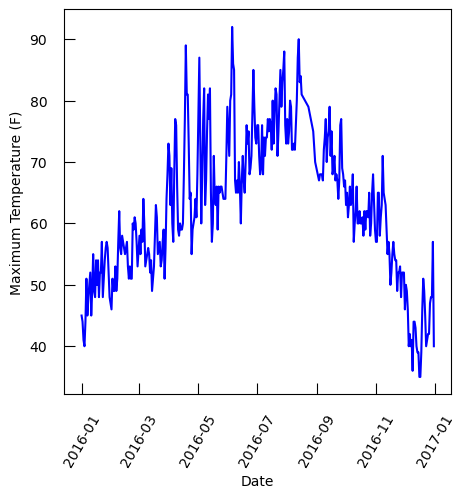

In [95]:
import datetime
feature_list=list(features.columns)
labels=features["actual"]
# Dates of training values
months = np.array(features)[:, feature_list.index('month')]
days = np.array(features)[:, feature_list.index('day')]
years = np.array(features)[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})


plt.xlabel('Date'); 
plt.ylabel('Maximum Temperature (F)')

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
plt.xticks(rotation = 60)
plt.show()

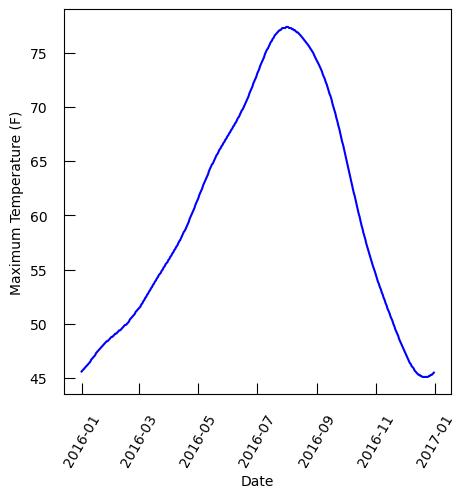

In [96]:
import datetime
feature_list=list(features.columns)
labels=features["average"]
# Dates of training values
months = np.array(features)[:, feature_list.index('month')]
days = np.array(features)[:, feature_list.index('day')]
years = np.array(features)[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'average': labels})


plt.xlabel('Date'); 
plt.ylabel('Maximum Temperature (F)')

# Plot the average values
plt.plot(true_data['date'], true_data['average'], 'b-', label = 'average')
plt.xticks(rotation = 60)
plt.show()

correction

Grid best parameter (max. r2):  {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
Grid best score (r2):  0.8144279667482424
Grid best parameter (max. r2) model on test:  0.8296173830060765
Features sorted per importance in discriminative process
              temp_1	0.701
             average	0.166
       forecast_noaa	0.044
        forecast_acc	0.035
      forecast_under	0.022
              temp_2	0.017
              friend	0.015


/tmp/ipykernel_650127/1170507330.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T,


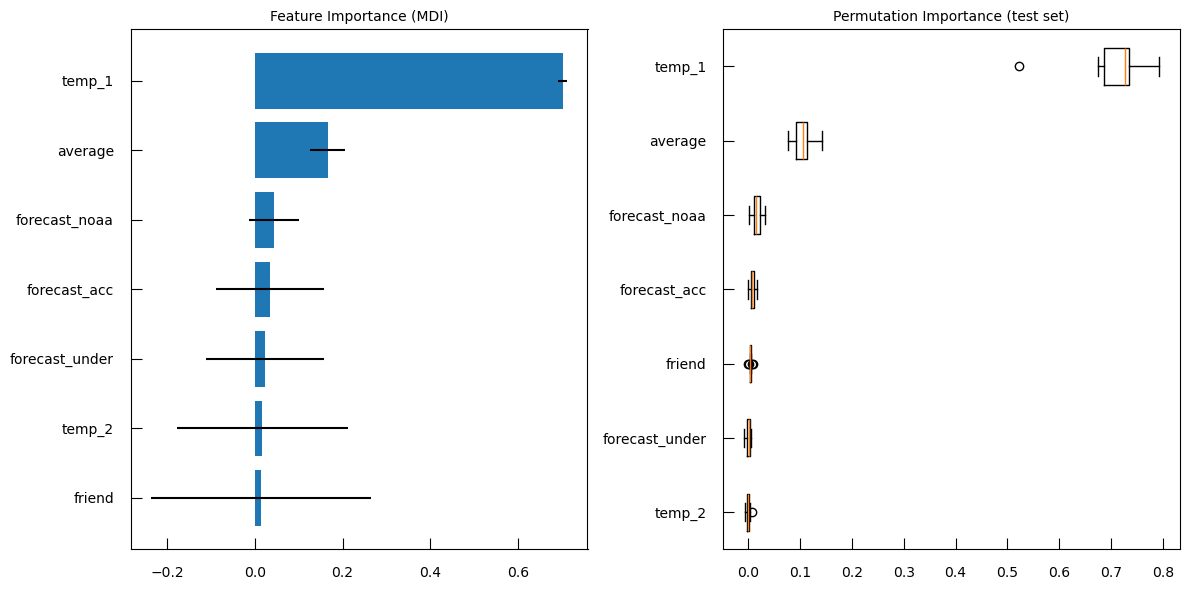

In [99]:
from sklearn.ensemble import RandomForestRegressor


## train/test split
y = np.array(features['actual'])
# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop([ 'year', 'month', 'day',
       'actual', 'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 42)


## setup and fit pipeline
grid_values = {'criterion': ['squared_error'],
               'n_estimators':[300,600,900], 
               'max_depth':[2,5,7],
               'min_samples_split':[4],
              'min_samples_leaf':[2]}# define the hyperparameters you want to test
#with the range over which you want it to be tested.

grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2',n_jobs=-1)#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset

## evaluate the model on the test set
# get the equivalent score on the test dataset : again this is the important metric
y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)

## get the feature importances 
w=grid_tree_acc.best_estimator_.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=lambda X : X[1],reverse=True)

print('Features sorted per importance in discriminative process')
for f,w in sorted_features:
    print('{:>20}\t{:.3f}'.format(f,w))

## using permutation to get the importances
from sklearn.inspection import permutation_importance
feature_importance = grid_tree_acc.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_tree_acc.best_estimator_.estimators_], axis=0)

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx],xerr=std[sorted_idx][::-1], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(grid_tree_acc.best_estimator_, 
                                X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()




Solution - BONUS - re-thinking the splitting strategy

![RF](images/TimeSeriesSplit.png)

Grid best parameter (max. r2):  {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 900}
Grid best score (r2):  0.16457210986633683
Grid best parameter (max. r2) model on test:  0.45442183876065745
Features sorted per importance in discriminative process
              temp_1	0.665
             average	0.334
              temp_2	0.001
              friend	0.000


/tmp/ipykernel_650127/1431063729.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T,


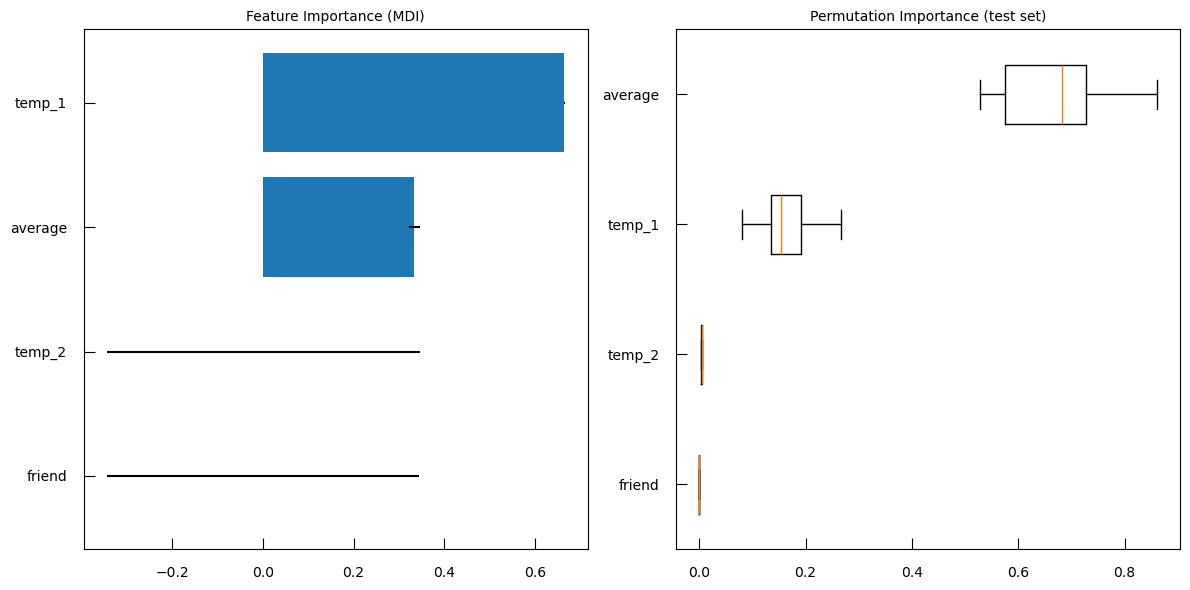

/home/wandrille/Installed_software/anaconda3/envs/introML2024/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/wandrille/Installed_software/anaconda3/envs/introML2024/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, '0.8981473578315659')

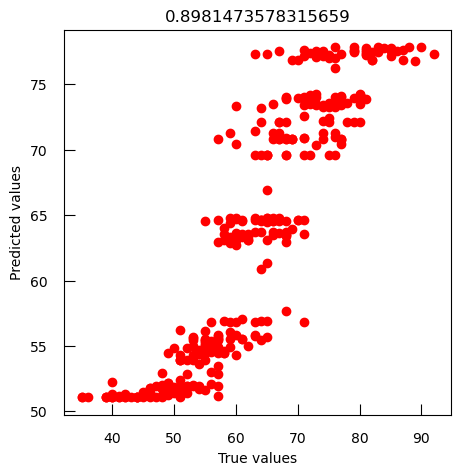

In [100]:
## Our splitting strategy doesn't seem to represent the reality of the process....
## inspired from https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/

import scipy as sc
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop([ 'year', 'month', 'day',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

## the train data is the 75% most ancient data, the test is the 25% most recent
X_train=np.array(X)[:int(len(X.index)*0.75),:]                                                                           
X_test=np.array(X)[int(len(X.index)*0.75):,:]
y_train=np.array(y)[:int(len(X.index)*0.75)]
y_test=np.array(y)[int(len(X.index)*0.75):]

grid_values = {'criterion': ['squared_error'],
               'n_estimators':[300,600,900], 
               'max_depth':[2,5,7],
               'min_samples_split':[4],
              'min_samples_leaf':[2]}# define the hyperparameters you want to test

#with the range over which you want it to be tested.
tscv = TimeSeriesSplit()
    
#Feed it to the GridSearchCV with the right
#score over which the decision should be taken    
grid_tree_acc = GridSearchCV(RandomForestRegressor(), 
                            param_grid = grid_values, 
                            scoring='r2',
                            cv=tscv,
                            n_jobs=-1)


grid_tree_acc.fit(X_train, y_train)



print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset



y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric


## feature importances
RF = grid_tree_acc.best_estimator_
W=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(W[i])] for i in range(len(W))],key=lambda x : x[1],reverse=True)

print('Features sorted per importance in discriminative process')
for f,w in sorted_features:
    print('{:>20}\t{:.3f}'.format(f,w))
    
from sklearn.inspection import permutation_importance

feature_importance = RF.feature_importances_#get the weights
std = np.std([tree.feature_importances_ for tree in grid_tree_acc.best_estimator_.estimators_], axis=0)

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx],xerr=std[sorted_idx][::-1], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()


## plotting the fit
plt.plot(y,RF.predict(X),'ro')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title(str(sc.stats.pearsonr(y,RF.predict(X))[0]))


Solution - BONUS - an even better splitting strategy

![RF](images/BlockedTimeSeriesSplit.png)

Grid best parameter (max. r2):  {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4}
Grid best score (r2):  -0.19281483458208248
Grid best parameter (max. r2) model on test:  0.4358468371037175
Features sorted per importance in discriminative process
[['temp_1', np.float64(0.6923327698349346)], ['average', np.float64(0.3071439719658726)], ['temp_2', np.float64(0.0005232581991927613)], ['friend', np.float64(0.0)]]


/tmp/ipykernel_650127/2903738990.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T,


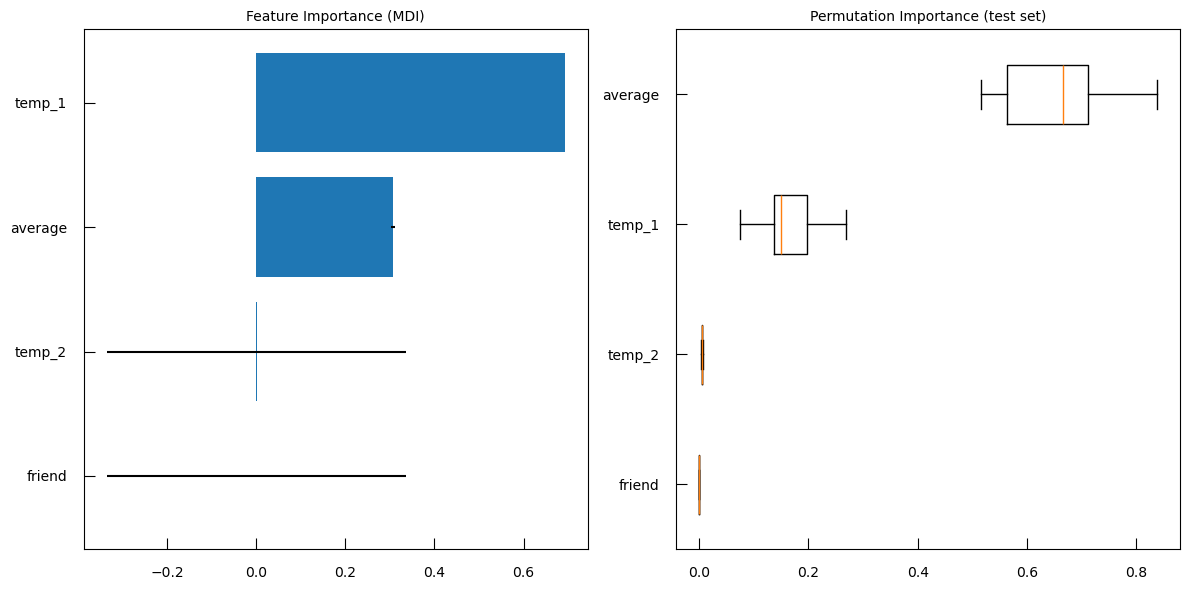

/home/wandrille/Installed_software/anaconda3/envs/introML2024/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/wandrille/Installed_software/anaconda3/envs/introML2024/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, '0.8964458857998946')

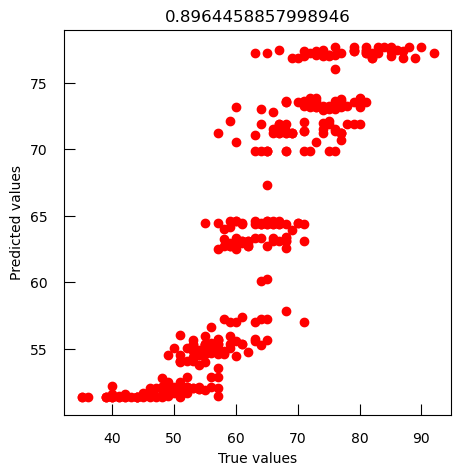

In [101]:
## Even better splitting strategy


# we define our own splitter class
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]
            
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop([ 'year', 'month', 'day',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)


X_train=np.array(X)[:int(len(X.index)*0.75),:]                                                                           
X_test=np.array(X)[int(len(X.index)*0.75):,:]
y_train=np.array(y)[:int(len(X.index)*0.75)]
y_test=np.array(y)[int(len(X.index)*0.75):]
grid_values = {'criterion': ['squared_error'],
                'max_depth':[2,5,7],
               'min_samples_split':[4],
              'min_samples_leaf':[2]}
#with the range over which you want it to be tested.
tscv = BlockingTimeSeriesSplit(n_splits=5)


    
#Feed it to the GridSearchCV with the right
#score over which the decision should be taken    
grid_tree_acc = GridSearchCV(RandomForestRegressor(), 
                            param_grid = grid_values, 
                             scoring='r2',
                             cv=tscv, 
                             n_jobs=-1)

grid_tree_acc.fit(X_train, y_train)



print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

## looking at feature importance 
RF = grid_tree_acc.best_estimator_
W=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(W[i])] for i in range(len(W))],key=lambda x : x[1],reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)


from sklearn.inspection import permutation_importance

feature_importance = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_tree_acc.best_estimator_.estimators_], axis=0)

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx],xerr=std[sorted_idx][::-1], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()


## plotting the fit
plt.plot(y,RF.predict(X),'ro')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title(str(sc.stats.pearsonr(y,RF.predict(X))[0]))